# Accident Data Analysis in Utah

Welcome to the our Project!
<br>
Vehicular accidents are unfortunately part of everyone’s reality. Our team sought to use prediction
analysis with data that we were able to retrieve, on vehicular accidents. Overall, we all feel that we
were very successful with this project and were able to work together to find some of the answers. The
largest challenge with this topic proved to be the variety of options and variables we could use in our
analysis. There are so many ways to analyze and use the data we had; it was hard just to focus on a few.
Our team found the topic to be very interesting and developed a passion for the answer. 
<br>
<br>
Let's start!

![title](title.jpg)

# Team Details 
### Members:

<table style="width:70%">
  <tr>
      <th>First Name</th>
      <th>Last Name</th>
      <th>Email</th>
      <th>UID</th>
  </tr>
  <tr>
    <td>Corrin</td>
    <td>Krogh</td> 
    <td>u0509985@utah.edu</td>
    <td>u0509985</td> 
  </tr>
  <tr>
    <td>Abhishek</td>
    <td>Anney</td> 
    <td>Abhishek.anney@utah.edu</td>
    <td>u0917533</td> 
  </tr>
  <tr>
    <td>Sam</td>
    <td>Barkat</td> 
    <td>sam.barkat@utah.edu</td>
    <td>u0816647</td> 
  </tr>
    
    

## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [372]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties
import seaborn as sns 
import itertools
import scipy.stats as ss
import pydotplus
from sklearn import metrics
from scipy import misc
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## STEP 1 :Get the Data
** Read the "Data request - Jan 2018 to Jan 2019 - Anney Abhishek - Delivered March 2019 - subject to changes.xlsx" file into a jupyter notebook**

In [373]:
#COMMENT OUT THIS CODE AFTER FIRST RUN. THIS IS TAKING SOME PROCESSING TIME.
#THE FILE NAME IS THE SAME AS ORIGINALLY RECIEVED FROM DMV
xls = pd.ExcelFile('Data request - Jan 2018 to Jan 2019 - Anney Abhishek - Delivered March 2019 - subject to changes.xlsx')
Crash = pd.read_excel(xls,'Crash')
Vehicle = pd.read_excel(xls,'Vehicle')
Person = pd.read_excel(xls,'Person')

**Save the individual tabs of the excel file in csv format**

In [220]:
Crash.to_csv('Crash.csv',index=False)
Vehicle.to_csv('Vehicle.csv',index=False)
Person.to_csv('Person.csv',index=False)

**Now read the saved csv files as a pandas dataframe**

In [221]:
Vehicle= pd.read_csv("Vehicle.csv")
Crash= pd.read_csv("Crash.csv")
Person = pd.read_csv('Person.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (12,19) have mixed types. Specify dtype option on import or set low_memory=False.



** Check the shape of the dataframes **

In [222]:
print(Vehicle.shape)
print(Crash.shape)
print(Person.shape)

(128328, 24)
(68524, 31)
(171540, 27)


- All the three csv files have different dimensions.
- We are going to merge the data and create a single dataset for our analysis.

** Check the info of the dataframes **

In [223]:
print("VEHICLE: \n")
print(Vehicle.info())
print("CRASH: \n")
print(Crash.info())
print("PERSON: \n")
print(Person.info())

VEHICLE: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128328 entries, 0 to 128327
Data columns (total 24 columns):
request_crash_id             128328 non-null int64
vehicle_num                  128328 non-null int64
vehicle_num_occupants        0 non-null float64
estimated_travel_speed       93304 non-null float64
posted_speed                 104352 non-null float64
event_sequence_1_id          128328 non-null int64
event_sequence_2_id          128328 non-null object
event_sequence_3_id          128328 non-null object
event_sequence_4_id          128328 non-null object
visual_contrib_circum_id     128328 non-null int64
most_harmful_event_id        128328 non-null int64
area_init_impact_id          128328 non-null int64
most_damaged_area_id         128328 non-null object
extent_deformity_id          128328 non-null int64
vehicle_maneuver_id          128328 non-null int64
vehicle_contrib_circum_id    128328 non-null int64
travel_direction_id          128328 non-null int64
roadway

- The variables are of int, float, object type

In [224]:
print("VEHICLE:")
Vehicle.head(3)

VEHICLE:


,request_crash_id,vehicle_num,vehicle_num_occupants,estimated_travel_speed,posted_speed,event_sequence_1_id,event_sequence_2_id,event_sequence_3_id,event_sequence_4_id,visual_contrib_circum_id,...,vehicle_maneuver_id,vehicle_contrib_circum_id,travel_direction_id,roadway_description_id,traffic_control_device_id,vehicle_disposition_id,mv_body_id,trailing_unit_id,cargo_body_id,mv_special_function_id
0,3000001,1,NaN,NaN,NaN,20,89,89,89,0,...,13,97,5,2,0,3,1,0,96,0
1,3000001,2,NaN,NaN,NaN,21,89,89,89,0,...,1,0,4,2,0,2,2,0,96,0
2,3000002,1,NaN,5.0,30.0,20,96,96,96,0,...,6,0,2,2,0,1,4,0,96,0


In [225]:
print("CRASH: ")
Crash.head(3)

CRASH: 


,request_crash_id,crash_datetime,county_id,northing,easting,location_description,city,route,route_direction,exit_number,...,work_zone_worker_present_ynu,work_zone_id,work_zone_location_id,horizontal_alignment_id,vertical_alignment_id,roadway_contrib_circum_id,number_vehicles_involved,total_number_roadway_lanes,first_harmful_event_id,first_harmful_evt_loc_id
0,3000001,2018-01-01 00:00:00,35,40.66726484,-112.0045491,4760 w 4715 s,W VALLEY CITY,-,-,0,...,0,96,96,1,1,97,NaN,NaN,21,1
1,3000002,2018-01-01 00:01:00,49,40.1098346,-111.6543578,CENTER ST; at Center Street,Spanish Fork,-,-,0,...,0,96,96,1,1,0,NaN,5.0,20,1
2,3000003,2018-01-01 00:10:00,11,41.1180849,-112.0358331,300 N Bridge; W Side,Clearfield,-,-,0,...,0,96,96,1,2,0,NaN,NaN,41,99


In [226]:
print("PERSON: ")
Person.head(3)

PERSON: 


,request_crash_id,vehicle_num,person_id,age,injury_level_id,injury_area_id,injury_cause_id,ejection_id,ejection_path_id,air_bag_id,...,transported_to_code_id,driver_contrib_circum_1_id,driver_contrib_circum_2_id,driver_condition_id,driver_distraction_id,extrication_id,sex,nonmotor_action_id,nonmotor_contrib_cir_id,nonmotor_location_id
0,3000001,2.0,1,28.0,3,NaN,6,0,96,1,...,NaN,0.0,0.0,1.0,0.0,1,F,96.0,96.0,96.0
1,3000002,1.0,1,42.0,1,NaN,0,0,96,1,...,0,0.0,99.0,1.0,99.0,1,M,96.0,96.0,96.0
2,3000002,2.0,1,45.0,1,NaN,0,0,96,1,...,0,99.0,0.0,1.0,99.0,1,M,96.0,96.0,96.0


## STEP 2 :Merge the Data
- request_crash_id looks a common varaible in all the three data files.
- As the dimensions are not same for all we will be creating a composite merge key to join person and vehicle csv files.

** Creating composite column for vehicle and person data for Merging **

In [227]:
#CREATE COMPOSITE COLUMN FOR VEHICLE FOR MERGING
Vehicle['m_column'] = Vehicle.request_crash_id.map(str) + "_"+ Vehicle.vehicle_num.map(str)

In [228]:
# Checking the head of the merge column
Vehicle.m_column.head(3)

0    3000001_1
1    3000001_2
2    3000002_1
Name: m_column, dtype: object

In [229]:
#CREATE COMPOSITE COLUMN FOR VEHICLE FOR MERGING
Person['m_column'] = Person.request_crash_id.map(str) + "_"+ Person.vehicle_num.map(str)

In [230]:
# Checking the head of the merge column. We see a new column has decimal point.We will be truncating the decimal point.
Person.m_column.head(3)

0    3000001_2.0
1    3000002_1.0
2    3000002_2.0
Name: m_column, dtype: object

In [231]:
# Feature engineering the merge column of persons dataframe by truncating the decimal point
Person.m_column = Person['m_column'].str.split('.').apply(lambda x: x[0])

In [232]:
#Recheck the head of person's merge column. The result looks desirable.
Person.m_column.head(3)

0    3000001_2
1    3000002_1
2    3000002_2
Name: m_column, dtype: object

** Performimg Merge **

In [233]:
# MERGE 1
df= pd.merge(Crash, Vehicle, on=['request_crash_id'])

In [234]:
# review the shape of the first merge
df.shape

(128328, 55)

In [235]:
# MERGE 2 - Final Merge
final = pd.merge(df, Person, on=['m_column'])

In [236]:
#Check shape of the final dataset
final.shape

(170208, 82)

In [237]:
#Check shape of the person dataset
Person.shape

(171540, 28)

In [238]:
# SAVE THE Merged Dataframe as a CSV FILE.
# COMMENT OUT THIS CODE AFTER FIRST RUN. 
#IT MAY OVERWITE tHE MERGED DATASET OR THROW AN ERROR OCCATIONALLY.
final.to_csv("final_data.csv", index=False)

**Conclusion:  Dataframes Merging**

- First created a composite merge key with same name in Person and Vehicle data.
- Performed first merge on Crash and Vehicle data on " Request_crash_id"
- Perfomed Second merge on result set of the first merge and Person data on composite key "m_column"
- After merging all the three dataframes the dimensions are (170208, 82).
- **The number of observations can be equal to or less than the observations of the Person data as the person data had most recorded observations i.e 171540**


## STEP 3 :Data Cleaning

In [239]:
#read the merged CSV
data = pd.read_csv('final_data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (36,37,42,49) have mixed types. Specify dtype option on import or set low_memory=False.



In [240]:
#head check 
data.head(2)

,request_crash_id_x,crash_datetime,county_id,northing,easting,location_description,city,route,route_direction,exit_number,...,transported_to_code_id,driver_contrib_circum_1_id,driver_contrib_circum_2_id,driver_condition_id,driver_distraction_id,extrication_id,sex,nonmotor_action_id,nonmotor_contrib_cir_id,nonmotor_location_id
0,3000001,2018-01-01 00:00:00,35,40.66726484,-112.0045491,4760 w 4715 s,W VALLEY CITY,-,-,0,...,NaN,0.0,0.0,1.0,0.0,1,F,96.0,96.0,96.0
1,3000002,2018-01-01 00:01:00,49,40.1098346,-111.6543578,CENTER ST; at Center Street,Spanish Fork,-,-,0,...,0,0.0,99.0,1.0,99.0,1,M,96.0,96.0,96.0


In [241]:
# info check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170208 entries, 0 to 170207
Data columns (total 82 columns):
request_crash_id_x              170208 non-null int64
crash_datetime                  170208 non-null object
county_id                       170208 non-null int64
northing                        167705 non-null object
easting                         167705 non-null object
location_description            170203 non-null object
city                            143349 non-null object
route                           170208 non-null object
route_direction                 170208 non-null object
exit_number                     170208 non-null int64
ramp_id                         0 non-null float64
milepoint                       170208 non-null int64
crash_severity_id               170208 non-null int64
light_condition_id              170208 non-null int64
weather_condition_id            170208 non-null int64
manner_collision_id             170208 non-null int64
pavement_id          

- ** Considering only drivers information**

In [242]:
#CONSIDERING ONLY DRIVERS INFORMATION
data = data[data['person_id']==1]

- As our data contains infomation of people involved in a crash we will need to limit our analysis to drivers only i.e we are not taking passengers into consideration.

In [243]:
#check shape
data.shape

(125590, 82)

- **Droping irrelavent Features**

In [244]:
data=data.drop(['trailing_unit_id','traffic_control_device_id','cargo_body_id'],axis=1)  

In [245]:
data=data.drop(['event_sequence_2_id','event_sequence_3_id','event_sequence_4_id'],axis=1) 

In [246]:
data=data.drop(['area_init_impact_id','vehicle_maneuver_id','mv_special_function_id'],axis=1)

In [247]:
data=data.drop(['mv_body_id','vehicle_disposition_id','most_damaged_area_id','most_harmful_event_id'],axis=1)

In [248]:
data=data.drop(['vehicle_num_occupants'],axis=1)

In [249]:
data=data.drop(['exit_number','ramp_id','work_zone_location_id','work_zone_related_ynu'],axis=1)

In [250]:
data=data.drop(['northing','easting','vertical_alignment_id','horizontal_alignment_id'],axis=1)

In [251]:
data=data.drop(['milepoint','work_zone_worker_present_ynu','work_zone_id','number_vehicles_involved'],axis=1)

In [252]:
data=data.drop(['pavement_id','roadway_junct_feature_id','route'],axis=1)

In [253]:
data=data.drop(['road_jurisdiction_id','first_harmful_evt_loc_id','first_harmful_event_id'],axis=1)

In [254]:
data=data.drop(['alcohol_drug_suspected_id','alcohol_drug_test_id','safety_equipment_id','injury_area_id'],axis=1)

In [255]:
data=data.drop(['ejection_id','extrication_id','extrication_id','air_bag_id','seating_position_id','transport_by_id'],axis=1)

In [256]:
data=data.drop(['used_properly_id','nonmotor_action_id','nonmotor_contrib_cir_id','ejection_path_id'],axis=1)

In [257]:
data=data.drop(['request_crash_id_y', 'vehicle_num_y'],axis=1)

In [258]:
data=data.drop(['transported_to_code_id'],axis=1)

In [259]:
data=data.drop(['estimated_travel_speed', 'driver_contrib_circum_1_id','driver_contrib_circum_2_id','total_number_roadway_lanes'],axis=1)

In [260]:
data=data.drop(['m_column'],axis=1)

- **As most of our data is categorical. We have a observation recorded as UNKOWN for every categorical feature as "99". We are excluding such observations.**
- ** Removing observations where the sex is "unknown"**

In [261]:
# made a list of columns for using while doing the models
cols = ['crash_severity_id',
 'light_condition_id',
 'weather_condition_id',
 'manner_collision_id',
 'roadway_surf_condition_id',
 'roadway_contrib_circum_id',
 'event_sequence_1_id',
 'visual_contrib_circum_id',
 'extent_deformity_id',
 'vehicle_contrib_circum_id',
 'travel_direction_id',
 'roadway_description_id',
 'person_id',
 'injury_level_id',
 'injury_cause_id',
 'alcohol_drug_test_res_id',
 'driver_condition_id',
 'driver_distraction_id',
 'nonmotor_location_id']

In [262]:
data = data[(data[cols] != 99).all(axis=1)]
data = data[(data['sex']!='U')]

In [263]:
#We have 29 features and 97606 observations
data.shape

(97606, 29)

** Null check and Data imputation Stage**
- From the dataset we see some missing observations. We are going to address them here now.
- First is the Age and second is the Posted speed which are continuous variables and will be imputed by a median of thier respective values as they are skewed
- Remove outliers of Age variable

Text(0.5,1,'Missing Observations from the dataset')

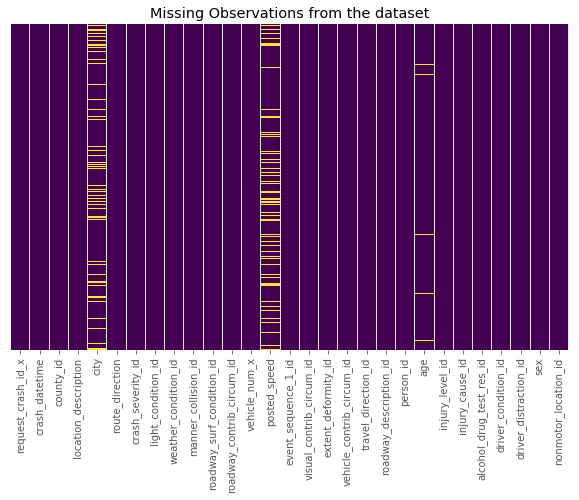

In [264]:
#heatmap to visualize missing data
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Observations from the dataset')
#plt.savefig('null_before.png')

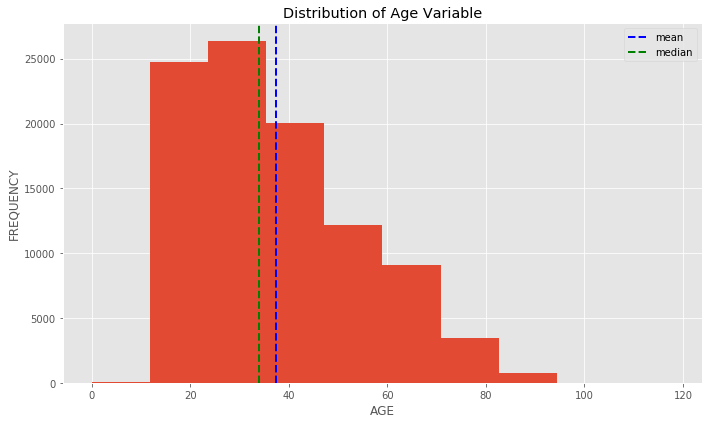

In [265]:
# AGE IS RIGHT SKEWED - PERFORMING MEDIAN IMPUTE ON MISSING OBSERVATIONS
data.hist(column='age')
plt.axvline(data.age.mean(), color='blue', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(data.age.median(), color='green', linestyle='dashed', linewidth=2,label = 'median')
plt.title("Distribution of Age Variable")
plt.xlabel("AGE")
plt.ylabel("FREQUENCY")
plt.legend()
plt.tight_layout()
#plt.savefig('Age_before_imputation.png')

In [266]:
#MEDIAN IMPUTE
data['age'] = data['age'].fillna(data.age.median())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



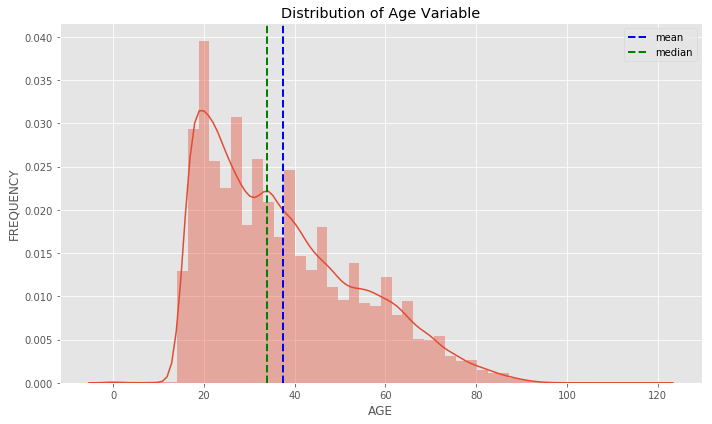

In [267]:
# using a dist plot of Seaborn plot the distribution of Age varaible after imputation
sns.distplot(data['age'])
plt.axvline(data.age.mean(), color='blue', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(data.age.median(), color='green', linestyle='dashed', linewidth=2,label = 'median')
plt.title("Distribution of Age Variable")
plt.xlabel("AGE")
plt.ylabel("FREQUENCY")
plt.legend()
plt.tight_layout()
#plt.savefig('Age_after_imputation.png')

In [268]:
#SUMMARY STATS OF AGE VARIABLE. There can be no person with Age 118 or there can be no person with age 0 involved in the crash
data.age.describe()

count    97606.000000
mean        37.412423
std         16.671669
min          0.000000
25%         23.000000
50%         34.000000
75%         48.000000
max        118.000000
Name: age, dtype: float64

In [269]:
#Removing the Outliers in age variable
data = data[(data['age'] >= 15) & (data['age'] <=80 )]

In [270]:
#Check the dimentions after removal of the outliers
data.shape

(96454, 29)

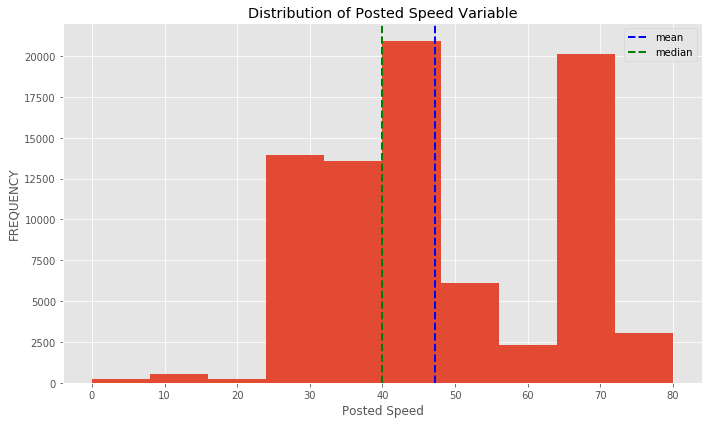

In [271]:
#DISTIRIBUTION LOOKS INCONSISTANT. CANNOT BE JUSTIFIED IF THE FEATURE IS RIGHT OR LEFT SKEWED. WE WILL GO WITH A MEDAIN IMPUTE
data.hist(column='posted_speed')
plt.axvline(data.posted_speed.mean(), color='blue', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(data.posted_speed.median(), color='green', linestyle='dashed', linewidth=2,label = 'median')
plt.title("Distribution of Posted Speed Variable")
plt.xlabel("Posted Speed")
plt.ylabel("FREQUENCY")
plt.legend()
plt.tight_layout()
#plt.savefig('posted_speed_before_imputation.png')

In [272]:
# median impute of the posted speed
data['posted_speed'] = data['posted_speed'].fillna(data.posted_speed.median())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



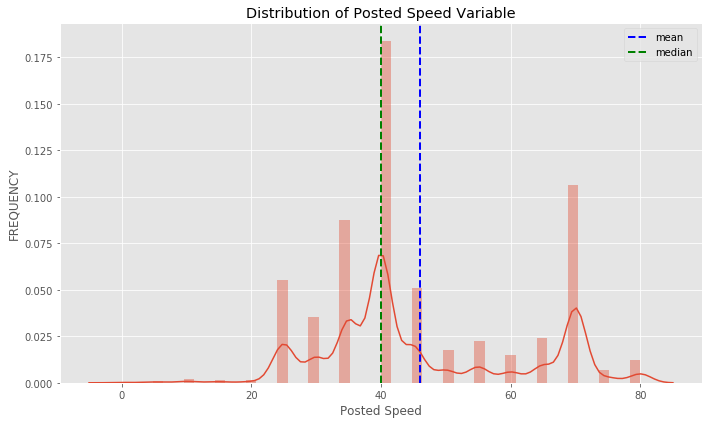

In [273]:
# Distribution after imputation
sns.distplot(data['posted_speed'])
plt.axvline(data.posted_speed.mean(), color='blue', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(data.posted_speed.median(), color='green', linestyle='dashed', linewidth=2,label = 'median')
plt.title("Distribution of Posted Speed Variable")
plt.xlabel("Posted Speed")
plt.ylabel("FREQUENCY")
plt.legend()
plt.tight_layout()
#plt.savefig('posted_speed_After_imputation.png')

In [274]:
#summary statistics of posted speed
data.posted_speed.describe()

count    96454.000000
mean        46.069567
std         15.705613
min          0.000000
25%         35.000000
50%         40.000000
75%         60.000000
max         80.000000
Name: posted_speed, dtype: float64

** Removing NA observations of features where the count of NAs is significantly less **


In [275]:
#DOING A NULL CHECK AGAIN AND REMOVEING OBSERVATIONS WHERE WE HAVE SIGNIFICANTLY LESS MISSING DATA
data.isnull().sum()

request_crash_id_x               0
crash_datetime                   0
county_id                        0
location_description             0
city                         13904
route_direction                  0
crash_severity_id                0
light_condition_id               0
weather_condition_id             0
manner_collision_id              0
roadway_surf_condition_id        0
roadway_contrib_circum_id        0
vehicle_num_x                    0
posted_speed                     0
event_sequence_1_id              0
visual_contrib_circum_id         0
extent_deformity_id              0
vehicle_contrib_circum_id        0
travel_direction_id              0
roadway_description_id           0
person_id                        0
age                              0
injury_level_id                  0
injury_cause_id                  0
alcohol_drug_test_res_id         5
driver_condition_id              5
driver_distraction_id            5
sex                             15
nonmotor_location_id

In [276]:
# Droping NA rows for the following features
data = data.dropna(axis=0, subset=['alcohol_drug_test_res_id'])
data = data.dropna(axis=0, subset=['driver_condition_id'])
data = data.dropna(axis=0, subset=['driver_distraction_id'])
data = data.dropna(axis=0, subset=['sex'])
data = data.dropna(axis=0, subset=['nonmotor_location_id'])

Text(0.5,1,'Missing Data Distribution 2')

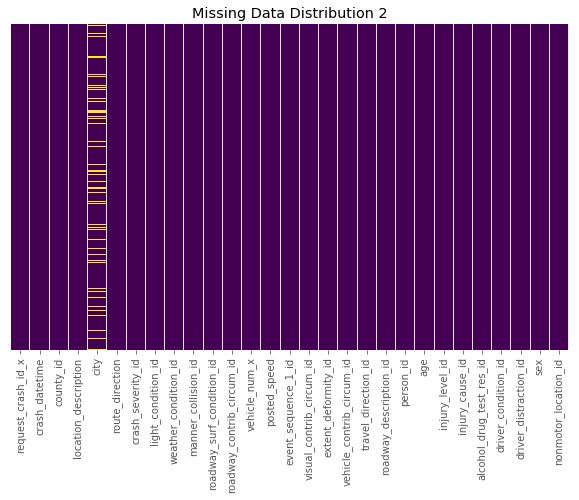

In [277]:
# FROM THE BELOW ONLY CITY IS THE POINT OF CONCERN AS IT HAS TOO MANY MISSING OBSERVATIONS.ALL OTHER FEATURES HAVE BEEN ADDRESSED
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data Distribution 2')
#plt.savefig('null_after.png')

** Feature Engineering Stage**
- We are going to create a numeric series for Sex varaible 
- Use some date time functions to create new features for EDA

In [278]:
#head check before dummitizing 
data.sex.head()

0     F
3     F
4     F
9     M
10    M
Name: sex, dtype: object

In [279]:
# dummitizing the sex variable and droping the first dummy 
data['sex'] = pd.get_dummies(data['sex'],drop_first=True)
data.sex.head()

0     0
3     0
4     0
9     1
10    1
Name: sex, dtype: uint8

In [280]:
#Checking the value counts of sex variable 
data.sex.value_counts()

1    56188
0    40246
Name: sex, dtype: int64

In [281]:
# REFORMATING THE CRASH_DATETIME COLUMN
data['crash_datetime'] = pd.to_datetime(data.crash_datetime)
data['crash_datetime'].head()

0    2018-01-01 00:00:00
3    2018-01-01 00:10:00
4    2018-01-01 00:10:00
9    2018-01-01 00:49:00
10   2018-01-01 01:10:00
Name: crash_datetime, dtype: datetime64[ns]

In [282]:
#Creating time relevant columns
data['time'] = data.crash_datetime.dt.time
data['date'] = data.crash_datetime.dt.date
data['year'] = data.crash_datetime.dt.year
data['month'] = data.crash_datetime.dt.month
data['dayofyear'] = data.crash_datetime.dt.dayofyear
data['quarter'] = data.crash_datetime.dt.quarter
data['days_in_month'] = data.crash_datetime.dt.days_in_month
data['day'] = data.crash_datetime.dt.day
data['hour'] = data.crash_datetime.dt.hour

In [283]:
#Droping the crash datetime
data=data.drop(['crash_datetime'],axis=1)

In [284]:
#Checking the info to see if the newly created columns are created
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96434 entries, 0 to 170206
Data columns (total 37 columns):
request_crash_id_x           96434 non-null int64
county_id                    96434 non-null int64
location_description         96434 non-null object
city                         82530 non-null object
route_direction              96434 non-null object
crash_severity_id            96434 non-null int64
light_condition_id           96434 non-null int64
weather_condition_id         96434 non-null int64
manner_collision_id          96434 non-null int64
roadway_surf_condition_id    96434 non-null int64
roadway_contrib_circum_id    96434 non-null int64
vehicle_num_x                96434 non-null int64
posted_speed                 96434 non-null float64
event_sequence_1_id          96434 non-null int64
visual_contrib_circum_id     96434 non-null int64
extent_deformity_id          96434 non-null int64
vehicle_contrib_circum_id    96434 non-null int64
travel_direction_id          96434 

In [285]:
data.head(3)

,request_crash_id_x,county_id,location_description,city,route_direction,crash_severity_id,light_condition_id,weather_condition_id,manner_collision_id,roadway_surf_condition_id,...,nonmotor_location_id,time,date,year,month,dayofyear,quarter,days_in_month,day,hour
0,3000001,35,4760 w 4715 s,W VALLEY CITY,-,3,3,1,6,1,...,96.0,00:00:00,2018-01-01,2018,1,1,1,31,1,0
3,3000003,11,300 N Bridge; W Side,Clearfield,-,2,2,1,96,1,...,96.0,00:10:00,2018-01-01,2018,1,1,1,31,1,0
4,3000004,35,4490 S; BRICKGATE APTS; at 160 W,MURRAY,-,1,2,1,6,1,...,96.0,00:10:00,2018-01-01,2018,1,1,1,31,1,0


**Interpretation**:

   - Above are the steps we took to clean the data.
    1. Got rid of the NAs
    2. Removed the unwanted columns
    3. Age and posted speed Median imputation
    4. Removed Age feature outliers
    5. Dummitized the Sex Variable to numeric
    6. Removed Unkown observations cited for sex ['u'] and other categorical variables ['99']
    

# STEP 4: EDA

**Use seaborn on the dataframe to create a barplot with the hue indicated by the Sex column.**
- allows us to see aggregate of categorical columns based of a function which is by default a mean function .

In [286]:
# making use of this temporary data as we wanted some attributes in the plots without disturbing our model behaviour and execution.
df_EDA = data.copy(deep=True)

In [287]:
df_EDA['county_id'] = df_EDA['county_id'].replace(1,"Beaver")
df_EDA['county_id'] = df_EDA['county_id'].replace(3,"Box Elder")
df_EDA['county_id'] = df_EDA['county_id'].replace(5,"Cache")
df_EDA['county_id'] = df_EDA['county_id'].replace(7,"Carbon")
df_EDA['county_id'] = df_EDA['county_id'].replace(9,"Daggett")
df_EDA['county_id'] = df_EDA['county_id'].replace(11,"Davis")
df_EDA['county_id'] = df_EDA['county_id'].replace(13,"Duschesne")
df_EDA['county_id'] = df_EDA['county_id'].replace(15,"Emery")
df_EDA['county_id'] = df_EDA['county_id'].replace(17,"Garfield")
df_EDA['county_id'] = df_EDA['county_id'].replace(19,"Grand")
df_EDA['county_id'] = df_EDA['county_id'].replace(21,"Iron")
df_EDA['county_id'] = df_EDA['county_id'].replace(23,"Juan")
df_EDA['county_id'] = df_EDA['county_id'].replace(25,"Kane")
df_EDA['county_id'] = df_EDA['county_id'].replace(27,"Millard")
df_EDA['county_id'] = df_EDA['county_id'].replace(29,"Morgan")
df_EDA['county_id'] = df_EDA['county_id'].replace(31,"Pitue")
df_EDA['county_id'] = df_EDA['county_id'].replace(33,"Rich")
df_EDA['county_id'] = df_EDA['county_id'].replace(35,"Salt Lake")
df_EDA['county_id'] = df_EDA['county_id'].replace(37,"San Juan")
df_EDA['county_id'] = df_EDA['county_id'].replace(39,"Sanpete")
df_EDA['county_id'] = df_EDA['county_id'].replace(41,"Sevier")
df_EDA['county_id'] = df_EDA['county_id'].replace(43,"Summit")
df_EDA['county_id'] = df_EDA['county_id'].replace(45,"Tooele")
df_EDA['county_id'] = df_EDA['county_id'].replace(47,"Unitah")
df_EDA['county_id'] = df_EDA['county_id'].replace(49,"Utah")
df_EDA['county_id'] = df_EDA['county_id'].replace(51,"Wasatch")
df_EDA['county_id'] = df_EDA['county_id'].replace(53,"Washington")
df_EDA['county_id'] = df_EDA['county_id'].replace(55,"Wayne")
df_EDA['county_id'] = df_EDA['county_id'].replace(57,"Weber")
df_EDA['sex'] = df_EDA['sex'].replace(0,"Female")
df_EDA['sex'] = df_EDA['sex'].replace(1,"Male")

In [288]:
df_EDA['crash_severity_id'] = df_EDA['crash_severity_id'].replace(1,"No Injury")
df_EDA['crash_severity_id'] = df_EDA['crash_severity_id'].replace(2,"Possible Injury")
df_EDA['crash_severity_id'] = df_EDA['crash_severity_id'].replace(3,"Non-Incapacitating Injury")
df_EDA['crash_severity_id'] = df_EDA['crash_severity_id'].replace(4," Incapacitating Injury")
df_EDA['crash_severity_id'] = df_EDA['crash_severity_id'].replace(5,"Fatal")

In [289]:
df_EDA['weather_condition_id'] = df_EDA['weather_condition_id'].replace(1,"Clear")
df_EDA['weather_condition_id'] = df_EDA['weather_condition_id'].replace(2,"Cloudy")
df_EDA['weather_condition_id'] = df_EDA['weather_condition_id'].replace(3,"Rainy")
df_EDA['weather_condition_id'] = df_EDA['weather_condition_id'].replace(4,"Snowing")
df_EDA['weather_condition_id'] = df_EDA['weather_condition_id'].replace(5,"Blowing Snow")
df_EDA['weather_condition_id'] = df_EDA['weather_condition_id'].replace(6,"Sleet,Hail")
df_EDA['weather_condition_id'] = df_EDA['weather_condition_id'].replace(7,"Fog/Smog")
df_EDA['weather_condition_id'] = df_EDA['weather_condition_id'].replace(8,"CrossWinds")
df_EDA['weather_condition_id'] = df_EDA['weather_condition_id'].replace(9,"Blowing Sand")
df_EDA['weather_condition_id'] = df_EDA['weather_condition_id'].replace(10,"CrossWinds")
df_EDA['weather_condition_id'] = df_EDA['weather_condition_id'].replace(99,"Unknown")

In [290]:
df_EDA['light_condition_id'] = df_EDA['light_condition_id'].replace(1,"Day Light")
df_EDA['light_condition_id'] = df_EDA['light_condition_id'].replace(2,"Dark Lighted")
df_EDA['light_condition_id'] = df_EDA['light_condition_id'].replace(3,"Dark Not-Lighted")
df_EDA['light_condition_id'] = df_EDA['light_condition_id'].replace(4,"Dark Unknown Lighted")
df_EDA['light_condition_id'] = df_EDA['light_condition_id'].replace(5,"Dawn")
df_EDA['light_condition_id'] = df_EDA['light_condition_id'].replace(6,"Dusk")
df_EDA['light_condition_id'] = df_EDA['light_condition_id'].replace(99,"Unknown")

In [291]:
df_EDA['roadway_surf_condition_id'] = df_EDA['roadway_surf_condition_id'].replace(1,"Dry")
df_EDA['roadway_surf_condition_id'] = df_EDA['roadway_surf_condition_id'].replace(2,"Wet")
df_EDA['roadway_surf_condition_id'] = df_EDA['roadway_surf_condition_id'].replace(3,"Snow")
df_EDA['roadway_surf_condition_id'] = df_EDA['roadway_surf_condition_id'].replace(4,"Slush")
df_EDA['roadway_surf_condition_id'] = df_EDA['roadway_surf_condition_id'].replace(5,"Ice")
df_EDA['roadway_surf_condition_id'] = df_EDA['roadway_surf_condition_id'].replace(6,"Water Standing/Moving")
df_EDA['roadway_surf_condition_id'] = df_EDA['roadway_surf_condition_id'].replace(7,"Mud")
df_EDA['roadway_surf_condition_id'] = df_EDA['roadway_surf_condition_id'].replace(8,"Sand/Dirt/Gravel")
df_EDA['roadway_surf_condition_id'] = df_EDA['roadway_surf_condition_id'].replace(9,"Oil")
df_EDA['roadway_surf_condition_id'] = df_EDA['roadway_surf_condition_id'].replace(97,"Other")
df_EDA['roadway_surf_condition_id'] = df_EDA['roadway_surf_condition_id'].replace(99,"Unknown")

In [292]:
df_EDA['driver_distraction_id'] = df_EDA['driver_distraction_id'].replace(0,"None")
df_EDA['driver_distraction_id'] = df_EDA['driver_distraction_id'].replace(1,"Cell Phone")
df_EDA['driver_distraction_id'] = df_EDA['driver_distraction_id'].replace(2,"Radio/CD/DVD")
df_EDA['driver_distraction_id'] = df_EDA['driver_distraction_id'].replace(3,"Other Electronic")
df_EDA['driver_distraction_id'] = df_EDA['driver_distraction_id'].replace(4,"Passenger")
df_EDA['driver_distraction_id'] = df_EDA['driver_distraction_id'].replace(97,"Other")
df_EDA['driver_distraction_id'] = df_EDA['driver_distraction_id'].replace(0,"Unknown")

In [293]:
df_EDA['manner_collision_id'] = df_EDA['manner_collision_id'].replace(1,"Angle")
df_EDA['manner_collision_id'] = df_EDA['manner_collision_id'].replace(2,"Front to rear")
df_EDA['manner_collision_id'] = df_EDA['manner_collision_id'].replace(3,"Head On")
df_EDA['manner_collision_id'] = df_EDA['manner_collision_id'].replace(4,"Sideswipe Same Direction")
df_EDA['manner_collision_id'] = df_EDA['manner_collision_id'].replace(5,"Sideswipe Opposite Direction")
df_EDA['manner_collision_id'] = df_EDA['manner_collision_id'].replace(6,"Parked Vehicle")
df_EDA['manner_collision_id'] = df_EDA['manner_collision_id'].replace(7,"Rear to Side")
df_EDA['manner_collision_id'] = df_EDA['manner_collision_id'].replace(8,"Rear to Rear")
df_EDA['manner_collision_id'] = df_EDA['manner_collision_id'].replace(99,"Unknown")

In [294]:
df_EDA['visual_contrib_circum_id'] = df_EDA['visual_contrib_circum_id'].replace(0,"None")
df_EDA['visual_contrib_circum_id'] = df_EDA['visual_contrib_circum_id'].replace(1,"Weather Condition")
df_EDA['visual_contrib_circum_id'] = df_EDA['visual_contrib_circum_id'].replace(2,"Physical Obstruction")
df_EDA['visual_contrib_circum_id'] = df_EDA['visual_contrib_circum_id'].replace(3,"Windshied/Windows Obscured")
df_EDA['visual_contrib_circum_id'] = df_EDA['visual_contrib_circum_id'].replace(4,"Trees/Bushes")
df_EDA['visual_contrib_circum_id'] = df_EDA['visual_contrib_circum_id'].replace(5,"Parked Vehicle")
df_EDA['visual_contrib_circum_id'] = df_EDA['visual_contrib_circum_id'].replace(6,"Signs/Billboards")
df_EDA['visual_contrib_circum_id'] = df_EDA['visual_contrib_circum_id'].replace(7,"Moving Vehicles")
df_EDA['visual_contrib_circum_id'] = df_EDA['visual_contrib_circum_id'].replace(8,"Building")
df_EDA['visual_contrib_circum_id'] = df_EDA['visual_contrib_circum_id'].replace(9,"Barrier")
df_EDA['visual_contrib_circum_id'] = df_EDA['visual_contrib_circum_id'].replace(10,"Glare")
df_EDA['visual_contrib_circum_id'] = df_EDA['visual_contrib_circum_id'].replace(11,"Smoke")
df_EDA['visual_contrib_circum_id'] = df_EDA['visual_contrib_circum_id'].replace(79,"Other")
df_EDA['visual_contrib_circum_id'] = df_EDA['visual_contrib_circum_id'].replace(99,"Unknowns")

In [295]:
df_EDA['extent_deformity_id'] = df_EDA['extent_deformity_id'].replace(0,"None")
df_EDA['extent_deformity_id'] = df_EDA['extent_deformity_id'].replace(1,"Minor")
df_EDA['extent_deformity_id'] = df_EDA['extent_deformity_id'].replace(2,"Moderate")
df_EDA['extent_deformity_id'] = df_EDA['extent_deformity_id'].replace(3,"Severe")
df_EDA['extent_deformity_id'] = df_EDA['extent_deformity_id'].replace(99,"Unknown")

In [296]:
df_EDA['driver_condition_id'] = df_EDA['driver_condition_id'].replace(1,"Normal")
df_EDA['driver_condition_id'] = df_EDA['driver_condition_id'].replace(2,"Illness")
df_EDA['driver_condition_id'] = df_EDA['driver_condition_id'].replace(3,"Fatigue/Sleep")
df_EDA['driver_condition_id'] = df_EDA['driver_condition_id'].replace(4,"Exceeded HOS Limits")
df_EDA['driver_condition_id'] = df_EDA['driver_condition_id'].replace(5,"Under the influence of drugs,Alcohol etc")
df_EDA['driver_condition_id'] = df_EDA['driver_condition_id'].replace(6,"Emotional")
df_EDA['driver_condition_id'] = df_EDA['driver_condition_id'].replace(97,"Other")
df_EDA['driver_condition_id'] = df_EDA['driver_condition_id'].replace(99,"Unknown")

<Figure size 1800x1800 with 0 Axes>

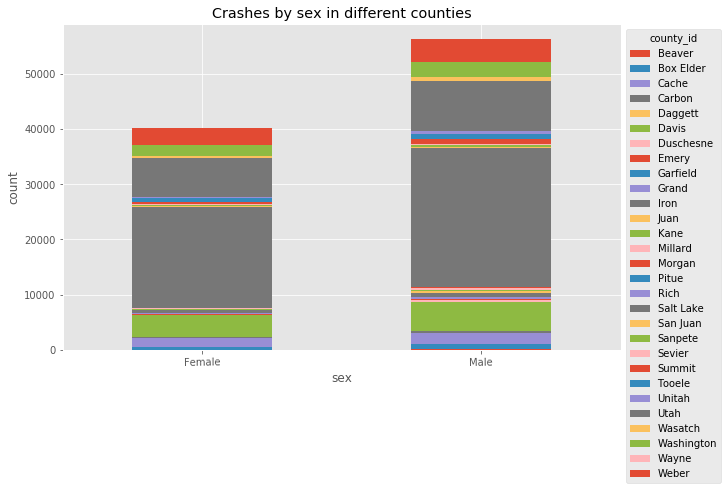

In [297]:
plt.figure(figsize=(25,25))
df_EDA.groupby(['sex','county_id'])['age'].size().unstack().plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',title='county_id') 
plt.title('Crashes by sex in different counties')
plt.ylabel('count')
plt.xticks(rotation=1)
plt.show()
#plt.savefig('Crashes_by_sex_counties.png')

** Interpretation ** :
   - This Graph Shows the distribution of male and female in crashes in different counties across UTAH.

In [298]:
df_EDA[['light_condition_id','request_crash_id_x','crash_severity_id']].groupby(['light_condition_id','crash_severity_id']).count()
#plt.savefig('light_sex_speed_severity.png')

request_crash_id_x
light_condition_id   crash_severity_id                            
Dark Lighted          Incapacitating Injury                    139
                     Fatal                                      30
                     No Injury                                8882
                     Non-Incapacitating Injury                1108
                     Possible Injury                          2268
Dark Not-Lighted      Incapacitating Injury                    143
                     Fatal                                      28
                     No Injury                                6096
                     Non-Incapacitating Injury                 600
                     Possible Injury                           976
Dark Unknown Lighted  Incapacitating Injury                      5
                     Fatal                                       2
                     No Injury                                 486
                     Non-Incapacitating Injury                  44
                     Possible Injury                           102
Dawn                  Incapacitating Injury                     15
                     No Injury                                1065
                     Non-Incapacitating Injury                 114
                     Possible Injury                           196
Day Light             Incapacitating Injury                    883
                     Fatal                                     105
                     No Injury                               53320
                     Non-Incapacitating Injury                5847
                     Possible Injury                         12080
Dusk                  Incapacitating Injury                     34
                     Fatal                                       6
                     No Injury                                1390
                     Non-Incapacitating Injury                 183
                     Possible Injury                           287

Text(0,0.5,'Sum of Crashes')

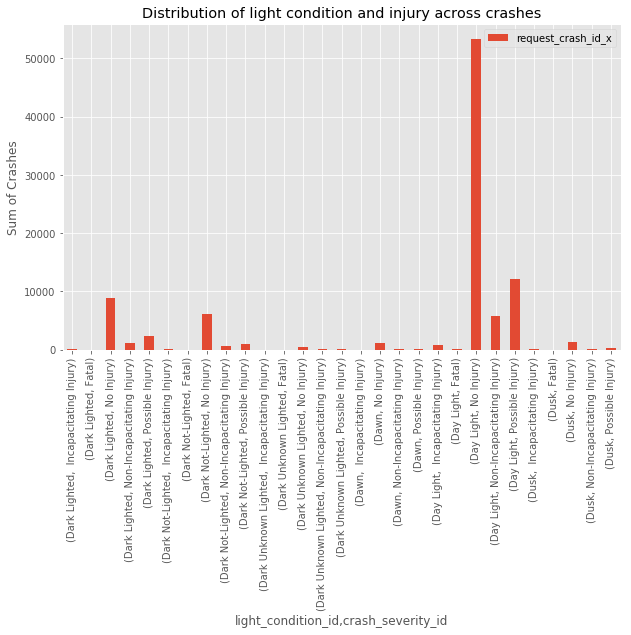

In [299]:
df_EDA[['light_condition_id','request_crash_id_x','crash_severity_id']].groupby(['light_condition_id','crash_severity_id']).count().plot(kind='bar')
plt.title('Distribution of light condition and injury across crashes')
plt.ylabel('Sum of Crashes')
#plt.savefig('light_id_severity.png')

** Interpretation: **
   - This graph shows the distribution of count of all crashes in different ranges of light with respect to severity of injuries per crash.
   - As seen above most of the crashes with little/no injury occuer during Daylight.

Text(0.5,1,'Count of Crashes per UTAH county')

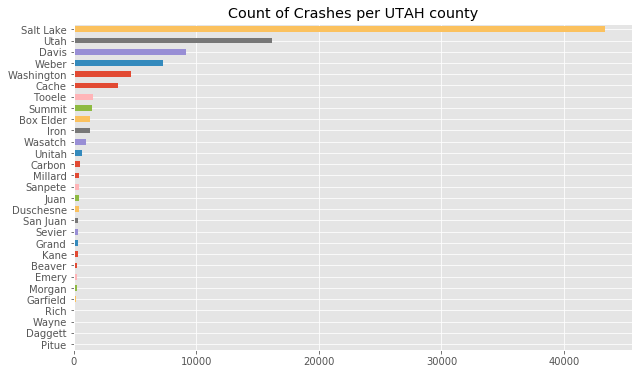

In [300]:
df_EDA['county_id'].value_counts().sort_values().plot.barh()
plt.title('Count of Crashes per UTAH county')
#plt.savefig('count_county.png')

** Reading in Country Population data **

  - Here we calculated the percentage of crashes with respect to each county's population.
  - As seen below there is not a significant difference between counties.Therefore we can conclude [From the below linear regression graph] that there is linear relationship between the polulation and total of crashes across all UTAH counties


In [301]:
County_population = pd.read_csv('County_pop.csv')

In [302]:
County_population.head()

,Code,county_id,Population
0,1,Beaver,6414
1,3,Box Elder,52182
2,5,Cache,120288
3,7,Carbon,20512
4,9,Daggett,702


In [303]:
m=data.groupby(by=['county_id']).count().reset_index()
m[['county_id','request_crash_id_x']].head()

,county_id,request_crash_id_x
0,1,255
1,3,1347
2,5,3604
3,7,552
4,9,38


In [304]:
County_population['request_id'] = m.request_crash_id_x
County_population['Accident_Percentage']= round(County_population['request_id']/County_population['Population']*100)
County_population.head()

,Code,county_id,Population,request_id,Accident_Percentage
0,1,Beaver,6414,255,4.0
1,3,Box Elder,52182,1347,3.0
2,5,Cache,120288,3604,3.0
3,7,Carbon,20512,552,3.0
4,9,Daggett,702,38,5.0


Text(0,0.5,'Number of Crashes')

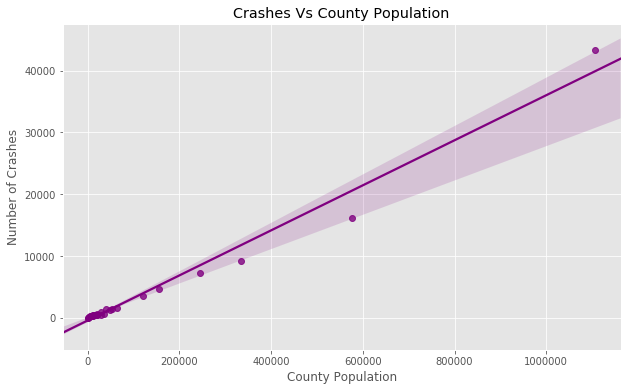

In [305]:
County_population.sort_values('Accident_Percentage',ascending=False)
sns.regplot(x="Population", y="request_id", data=County_population, x_jitter=.1,color='purple')
plt.title('Crashes Vs County Population')
plt.xlabel('County Population')
plt.ylabel('Number of Crashes')
#plt.savefig('Crashes_counties.png')

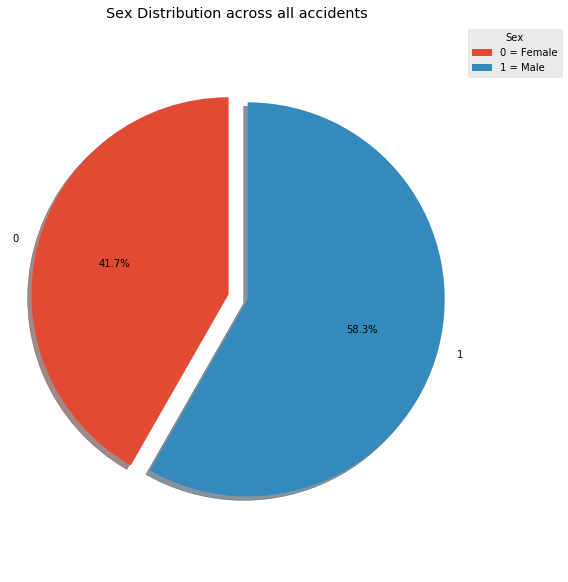

In [306]:
# Pie chart
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('ggplot')
labels = data.sex.value_counts().sort_index().index
sizes = data.sex.value_counts().sort_index().values
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.legend(['0 = Female','1 = Male'],bbox_to_anchor=(1, 1), loc='upper left',title='Sex')  
plt.tight_layout()
plt.title('Sex Distribution across all accidents')
plt.show()
#plt.savefig('Sex_dist.png')

** Interpretation **
  - Percentage of crashes among male and female drivers .

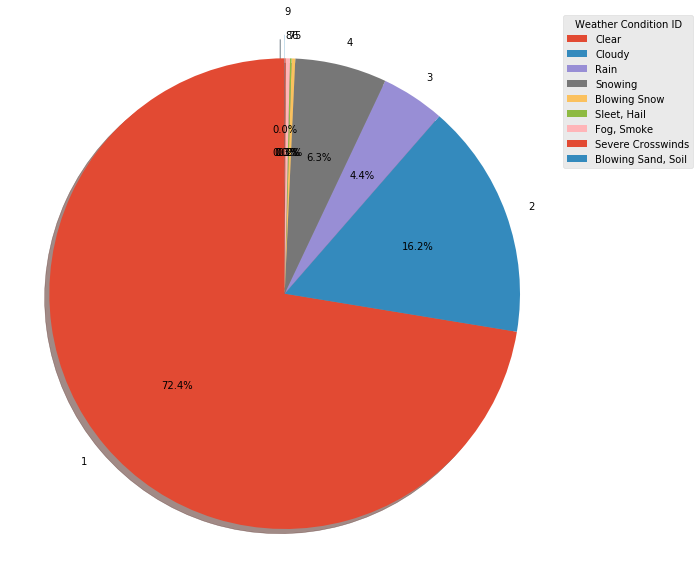

In [307]:
# Pie chart
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('ggplot')
labels = data.weather_condition_id.value_counts().sort_index().index
sizes = data.weather_condition_id.value_counts().sort_index()
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0,0,0,0,0,0,0,0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.legend(['Clear','Cloudy','Rain','Snowing','Blowing Snow', 'Sleet, Hail', 'Fog, Smoke', 'Severe Crosswinds', 'Blowing Sand, Soil'],bbox_to_anchor=(1, 1), loc='upper left',title='Weather Condition ID')
plt.show()
#plt.savefig('crash_severity_id.png')

#Shows that majority of accidents occurred in Clear conditions
# still doesn't tell us everything because there are more clear days vs. actual weather

M 37.61004128995515
F 35.91559409630771


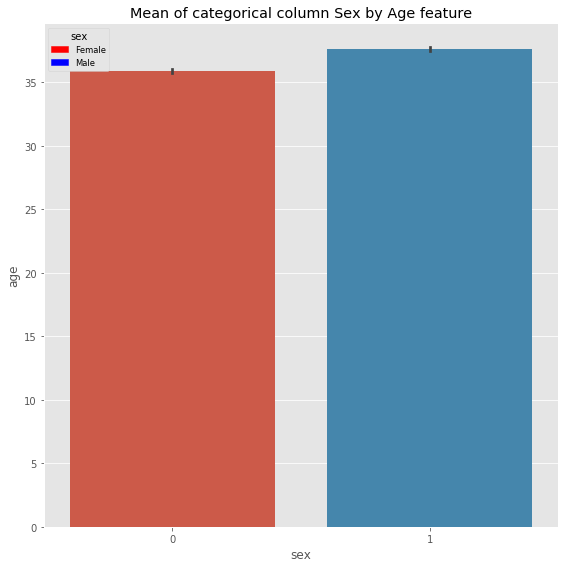

In [308]:
# Sex vs Age
sns.barplot(x='sex',y='age',data=data,estimator=np.mean)
plt.title('Mean of categorical column Sex by Age feature')
plt.ylabel('age')
plt.xlabel('sex')
fontP = FontProperties()
fontP.set_size('small')
red_patch = mpatches.Patch(color='red', label='Female')
blue_patch = mpatches.Patch(color='blue', label='Male')
plt.legend(handles=[red_patch,blue_patch],loc='best',prop=fontP,title='sex')
plt.tight_layout()
print('M',data[data.sex==1]['age'].mean())
print('F',data[data.sex==0]['age'].mean())
# plt.savefig('Mean_age_by_sex.png')

** Interpretation **
 - In this graph we show that the mean age of drives across male and female are very close. 

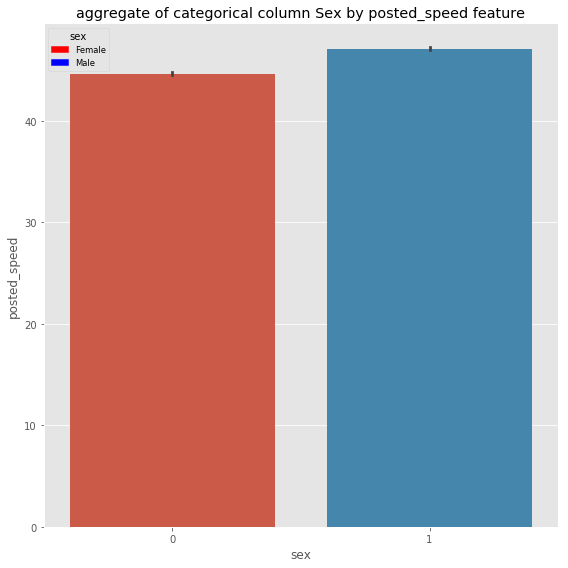

In [309]:
sns.barplot(x='sex',y='posted_speed',data=data,estimator=np.mean)
plt.title('aggregate of categorical column Sex by posted_speed feature')
plt.ylabel('posted_speed')
plt.xlabel('sex')
fontP = FontProperties()
fontP.set_size('small')
red_patch = mpatches.Patch(color='red', label='Female')
blue_patch = mpatches.Patch(color='blue', label='Male')
plt.legend(handles=[red_patch,blue_patch],loc='best',prop=fontP,title='sex')
plt.tight_layout()
#plt.savefig('mean_posted.png')

** Interpretation **
 - In this graph we show that the mean posted of drives across male and female are very close. 

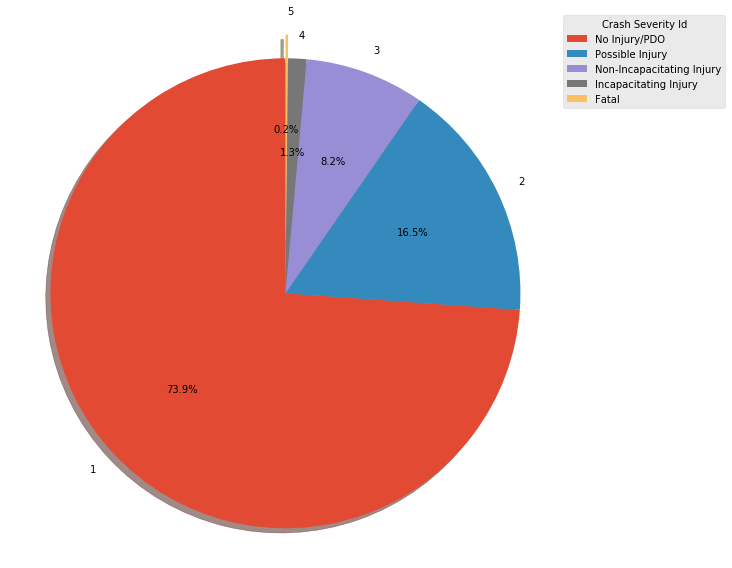

In [310]:
# Pie chart
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('ggplot')
labels = data.crash_severity_id.value_counts().sort_index().index
sizes = data.crash_severity_id.value_counts().sort_index()
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0,0,0,0,0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(['No Injury/PDO','Possible Injury','Non-Incapacitating Injury','Incapacitating Injury','Fatal'],bbox_to_anchor=(1, 1), loc='upper left',title='Crash Severity Id')  
plt.show()
#plt.savefig('crash_severity_id.png')

** interpretation ** 
  - Pie distribution of crash severity across all accidents.

Text(0.5,1,'Sampled by month - distribution of age ')

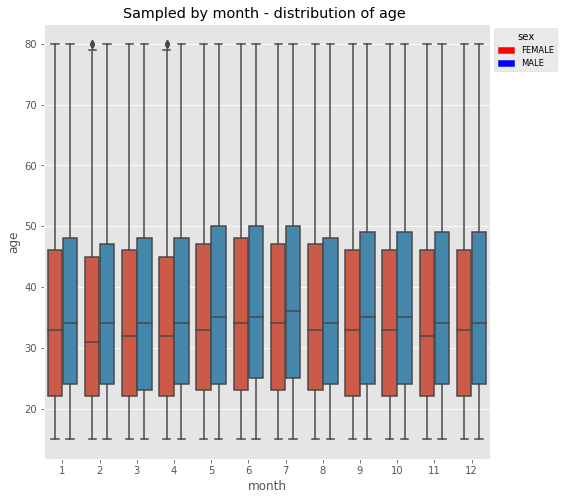

In [311]:
sns.boxplot(x='month',y='age',data=data,hue='sex')
fontP = FontProperties()
fontP.set_size('small')
red_patch = mpatches.Patch(color='red', label='FEMALE')
blue_patch = mpatches.Patch(color='blue', label='MALE')
plt.legend(handles=[red_patch,blue_patch],bbox_to_anchor=(1, 1),loc='best',prop=fontP,title='sex')
plt.title('Sampled by month - distribution of age ')
#plt.savefig('sampled_mean_of_age.png')

** Interpretation ** :
    - In this graph we show the distribution of crashes between both sexes across 12 months of the year
    - As seen above the median of age in females is always lower than males.
    - In particular months such as february and April this difference is wider.

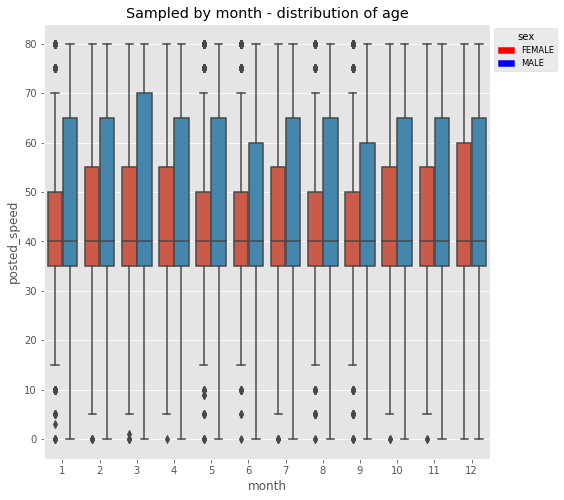

In [312]:
sns.boxplot(x='month',y='posted_speed',data=data,hue='sex')
fontP = FontProperties()
fontP.set_size('small')
red_patch = mpatches.Patch(color='red', label='FEMALE')
blue_patch = mpatches.Patch(color='blue', label='MALE')
plt.legend(handles=[red_patch,blue_patch],bbox_to_anchor=(1, 1),loc='best',prop=fontP,title='sex')
plt.title('Sampled by month - distribution of age')
plt.show()
#plt.savefig('sampled_posted_speed.png')

**Interpretation :**
- In this graph we show the distribution of crashes between both sexes across 12 months of the year
- As seen above the median of posted speed is the same for both the sexes as 40 miles/hr.
- Men drive faster than women.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



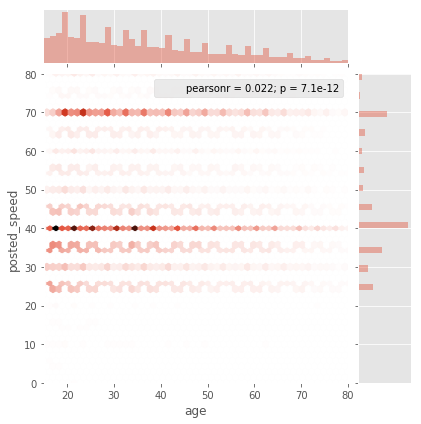

In [313]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
sns.jointplot(data['age'],data['posted_speed'],kind='hex')
#plt.savefig('jointplot.png')

**Interpretation**:
   - In this graph we see that the accidents at posted speed of 40 miles/hr is the highest across all the ages.
   - We also have similar results at 70 miles/hr
   - We particularly observe the surge in accidents at the above speed for yourger age between 18 - 28 appx.
   - We also observe that there are less drivers with age ranging from 50 to 80.

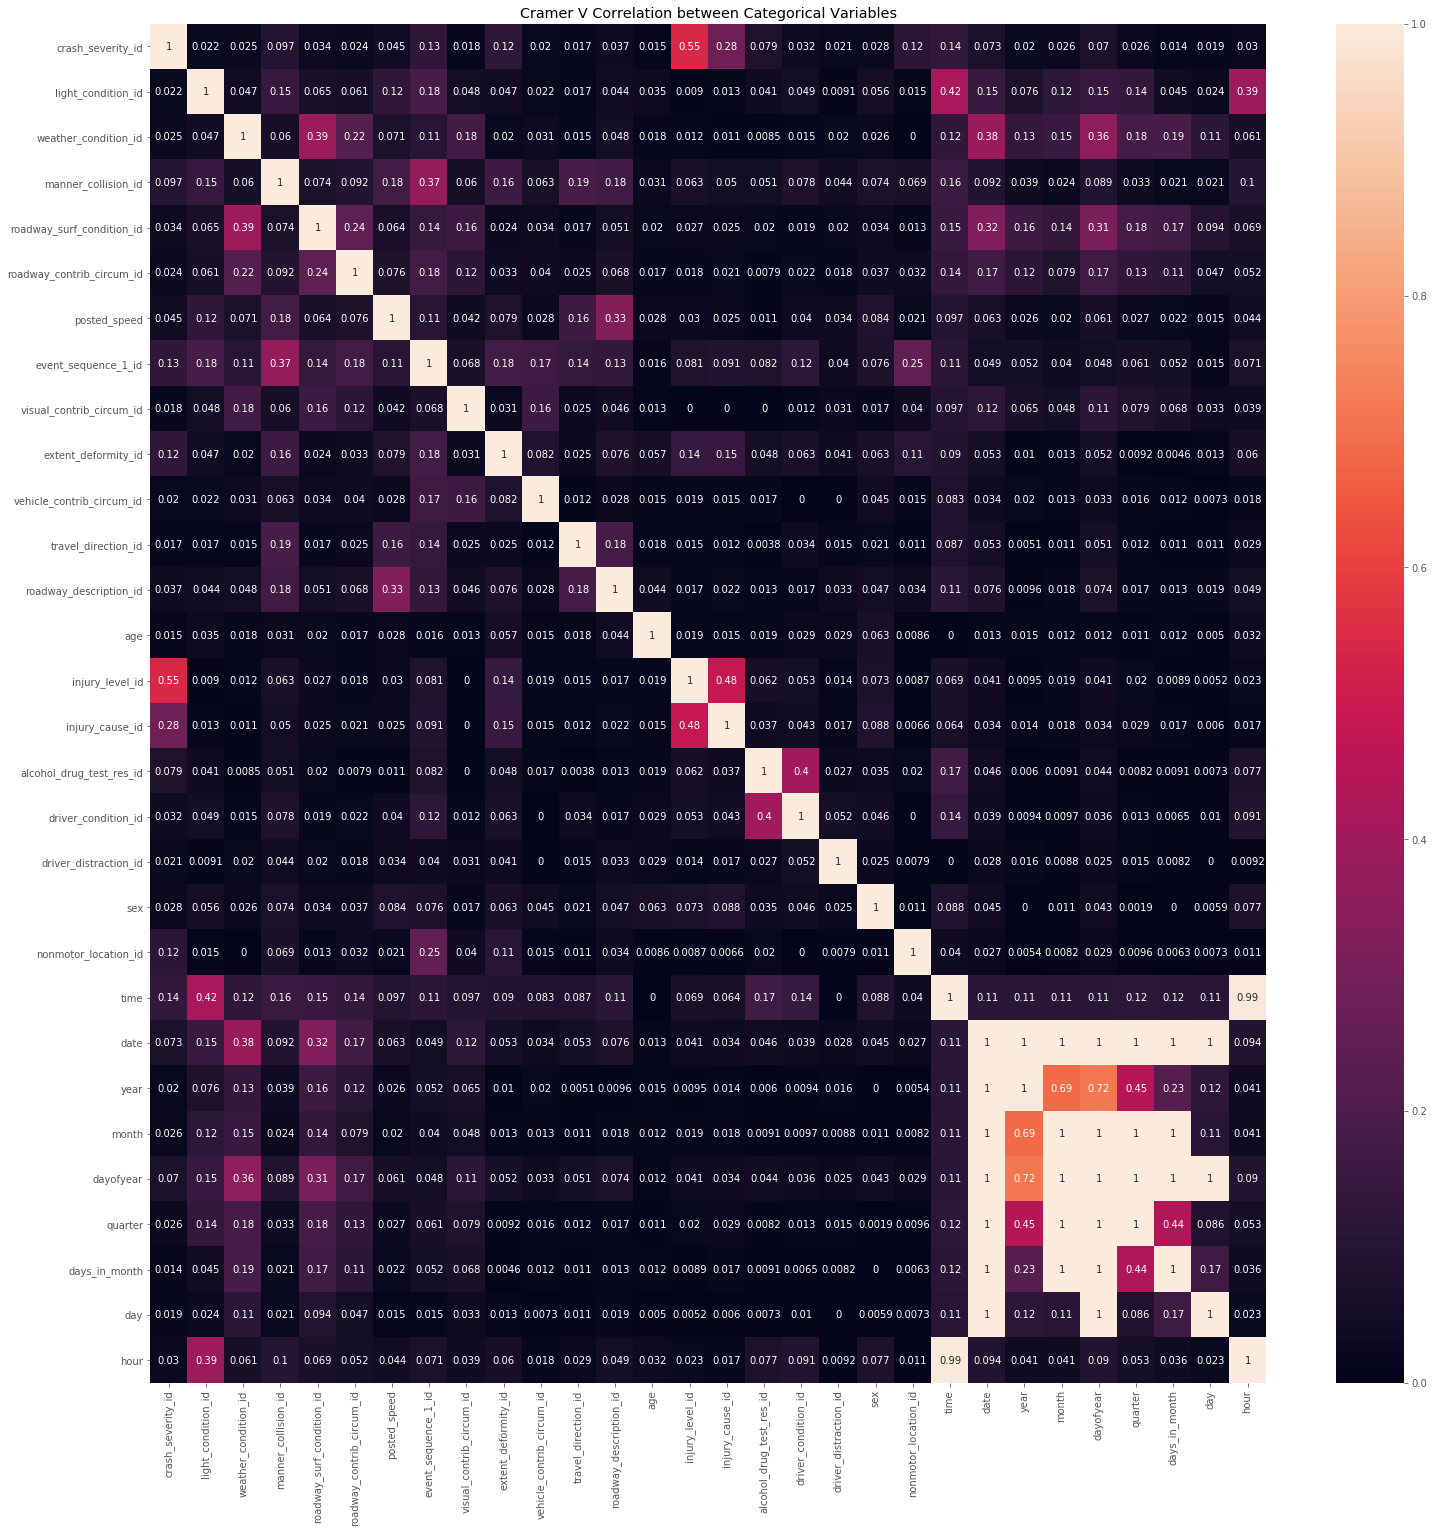

In [314]:
def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

cat_cols = ['crash_severity_id',
 'light_condition_id',
 'weather_condition_id',
 'manner_collision_id',
 'roadway_surf_condition_id',
 'roadway_contrib_circum_id',
 'posted_speed',
 'event_sequence_1_id',
 'visual_contrib_circum_id',
 'extent_deformity_id',
 'vehicle_contrib_circum_id',
 'travel_direction_id',
 'roadway_description_id',
 'age',
 'injury_level_id',
 'injury_cause_id',
 'alcohol_drug_test_res_id',
 'driver_condition_id',
 'driver_distraction_id',
 'sex',
 'nonmotor_location_id',
 'time',
 'date',
 'year',
 'month',
 'dayofyear',
 'quarter',
 'days_in_month',
 'day',
 'hour']
corrM = np.zeros((len(cat_cols),len(cat_cols)))
np.fill_diagonal(corrM, 1)

for col1, col2 in itertools.combinations(cat_cols, 2):
    idx1, idx2 = cat_cols.index(col1), cat_cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(data[col1], data[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]
corr = pd.DataFrame(corrM, index=cat_cols, columns=cat_cols)
fig, ax = plt.subplots(figsize=(25, 25))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Categorical Variables");

** Interpretation ** 
 - Above plot explains correlation of both categorical and numeric variables. 
 - Injury_level_Id correlates good with crash_severity_id
 - Injury_level_Id correlates good with injury_cause_id.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'den

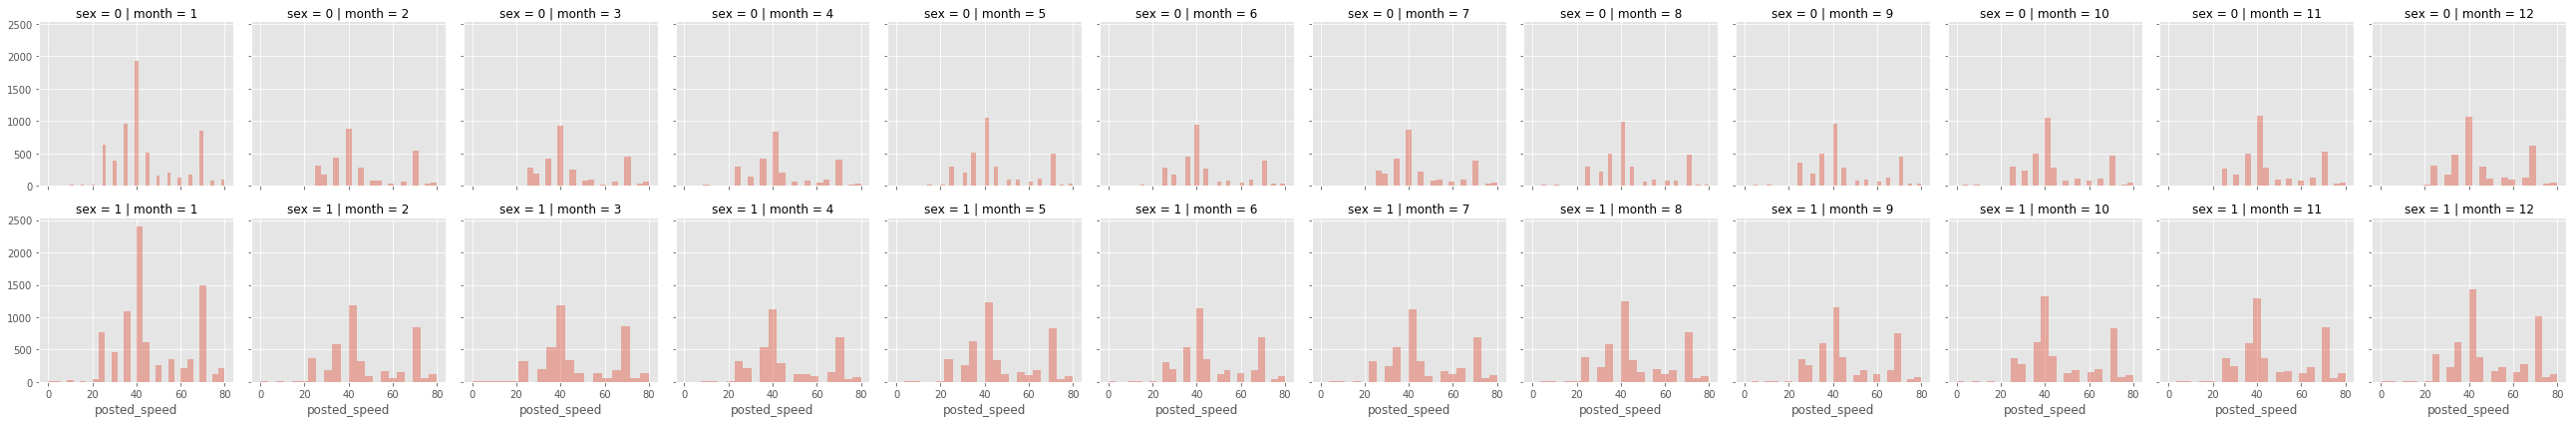

In [315]:
grid = sns.FacetGrid(data=data,col='month',row='sex') 
grid.map(sns.distplot,'posted_speed',kde=False)

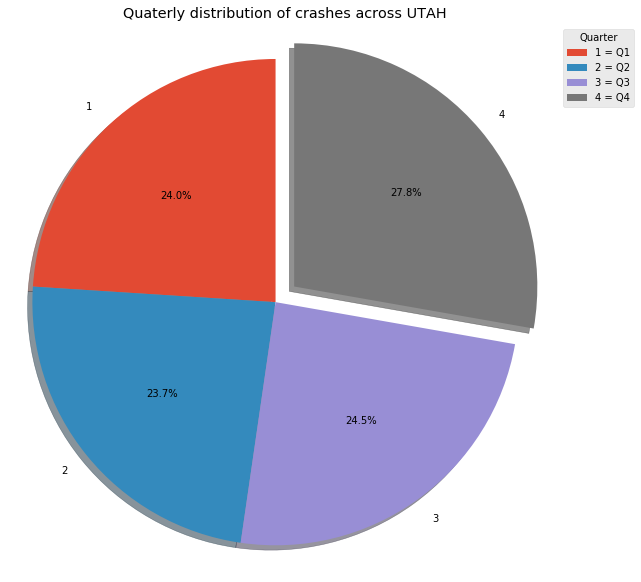

In [316]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('ggplot')
labels = data[data.year==2018].groupby('quarter').request_crash_id_x.count().index
sizes = data[data.year==2018].groupby('quarter').request_crash_id_x.count().values
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0,0,0,0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(['1 = Q1','2 = Q2','3 = Q3','4 = Q4'],bbox_to_anchor=(1, 1), loc='upper left',title='Quarter')  
plt.title('Quaterly distribution of crashes across UTAH')
plt.show()
#plt.savefig('Quarterly_crash.png')

** interpretataion **
   - As seen in the above graph in the last quarter of the year the number of accidents are the highest.

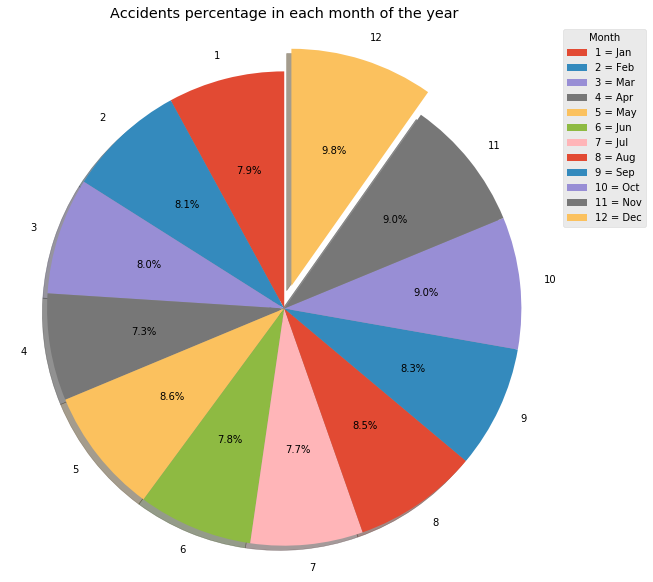

In [317]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('ggplot')
labels = data[data.year == 2018].groupby('month').request_crash_id_x.count().index
sizes = data[data.year == 2018].groupby('month').request_crash_id_x.count().values
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0,0,0,0,0,0,0,0,0,0,0,0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(['1 = Jan','2 = Feb','3 = Mar','4 = Apr','5 = May','6 = Jun','7 = Jul','8 = Aug','9 = Sep','10 = Oct','11 = Nov','12 = Dec'],bbox_to_anchor=(1, 1), loc='upper left',title='Month')  
plt.title('Accidents percentage in each month of the year')
plt.show()
#plt.savefig('monthly_percentage_accidents.png')

** Interpretation :**
    
   - From the above graph we can see that the closer we get to the holiday season the percentage of accidents rise which is perhaps to rise in travelling when the roads are most dangerous.

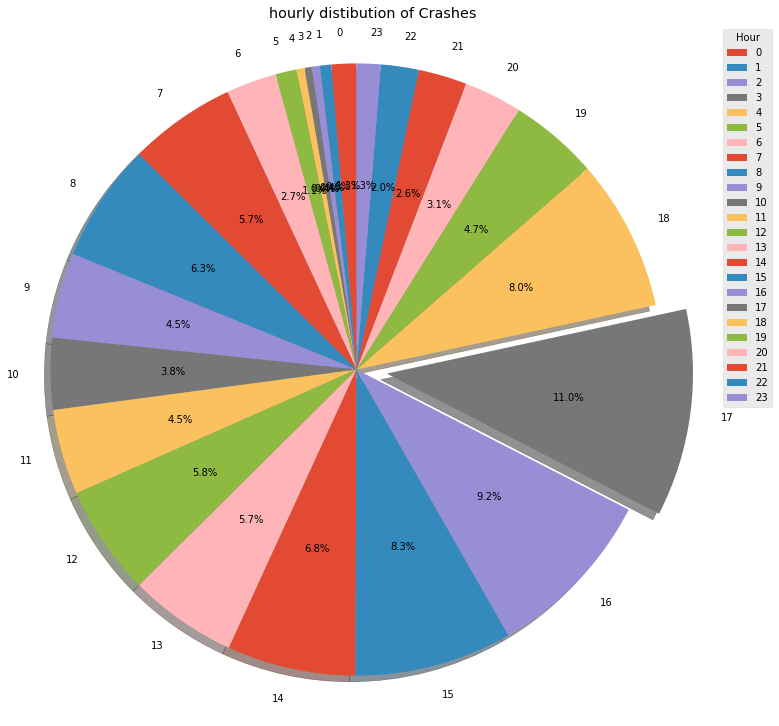

In [318]:
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('ggplot')
labels = data[data.year == 2018].groupby('hour').request_crash_id_x.count().index
sizes = data[data.year == 2018].groupby('hour').request_crash_id_x.count().values
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0,0,0,0,0,0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',title='Hour') 
plt.title('hourly distibution of Crashes')
plt.show()
#plt.savefig('hourly_crash_perc.png')

** Interpretation ** :
   - From our point of view this is one of the most important graphs as it describes how the number of accidents rise with the progressing of the day.
   - We think this is due to both the rush hour/traffic and people's tiredness during the afternoon hours.

<Figure size 720x720 with 0 Axes>

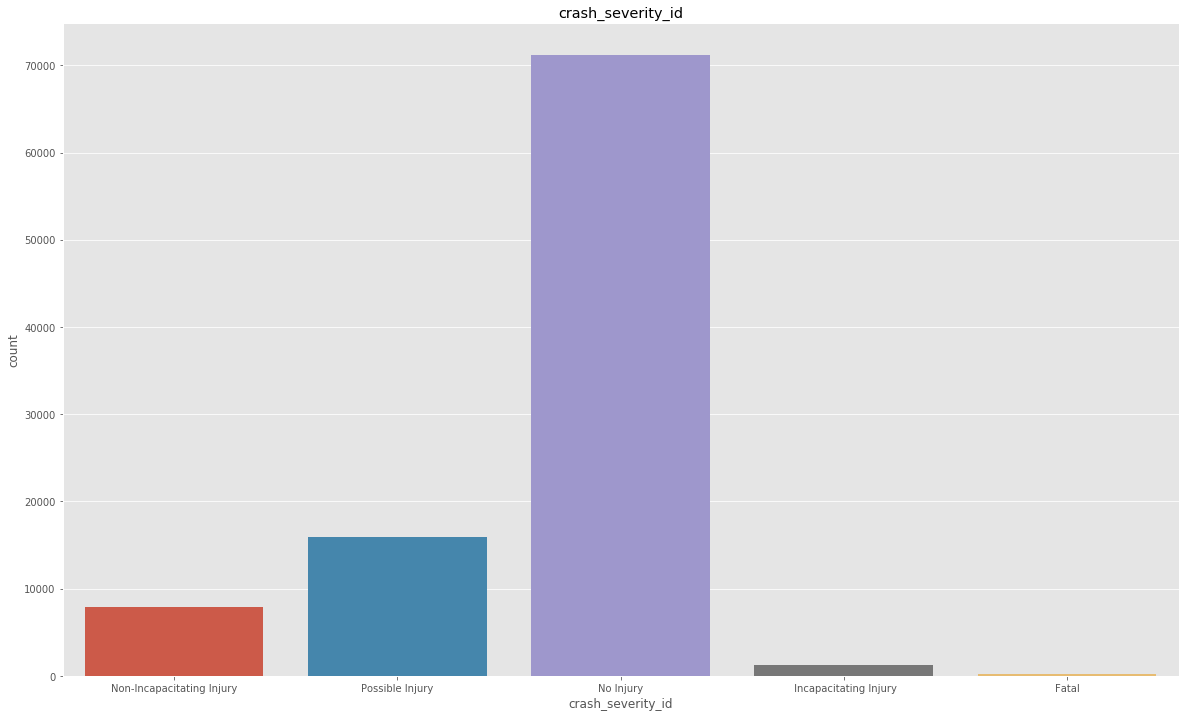

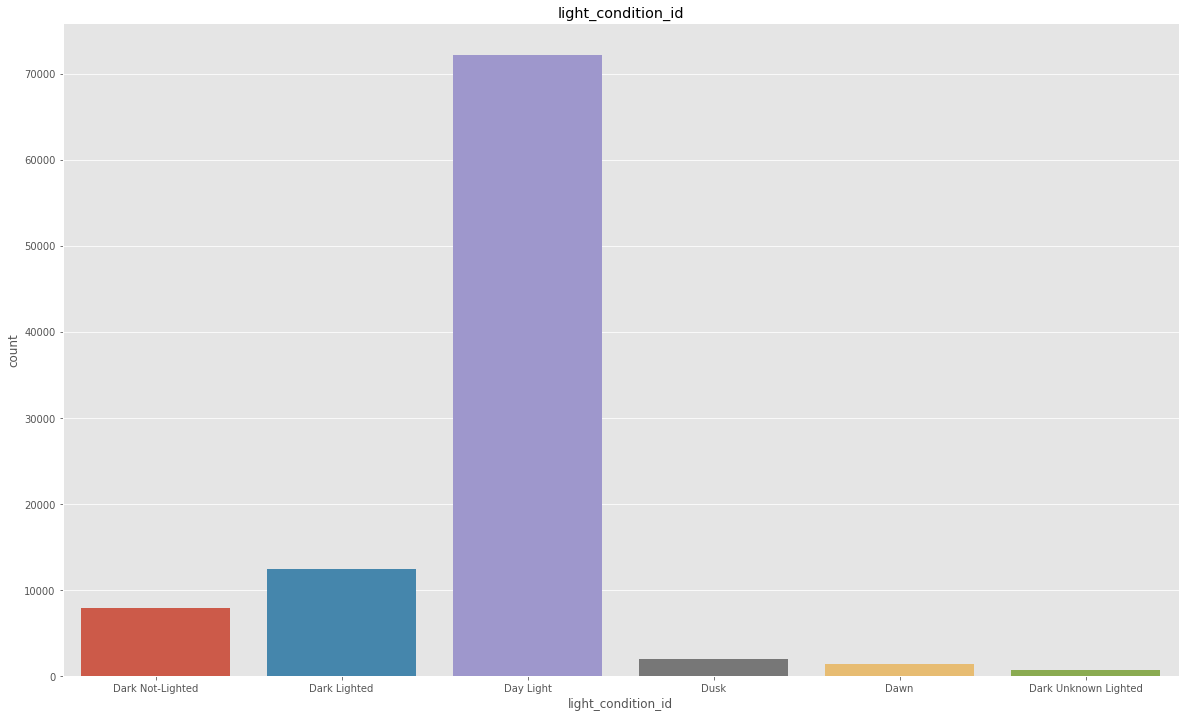

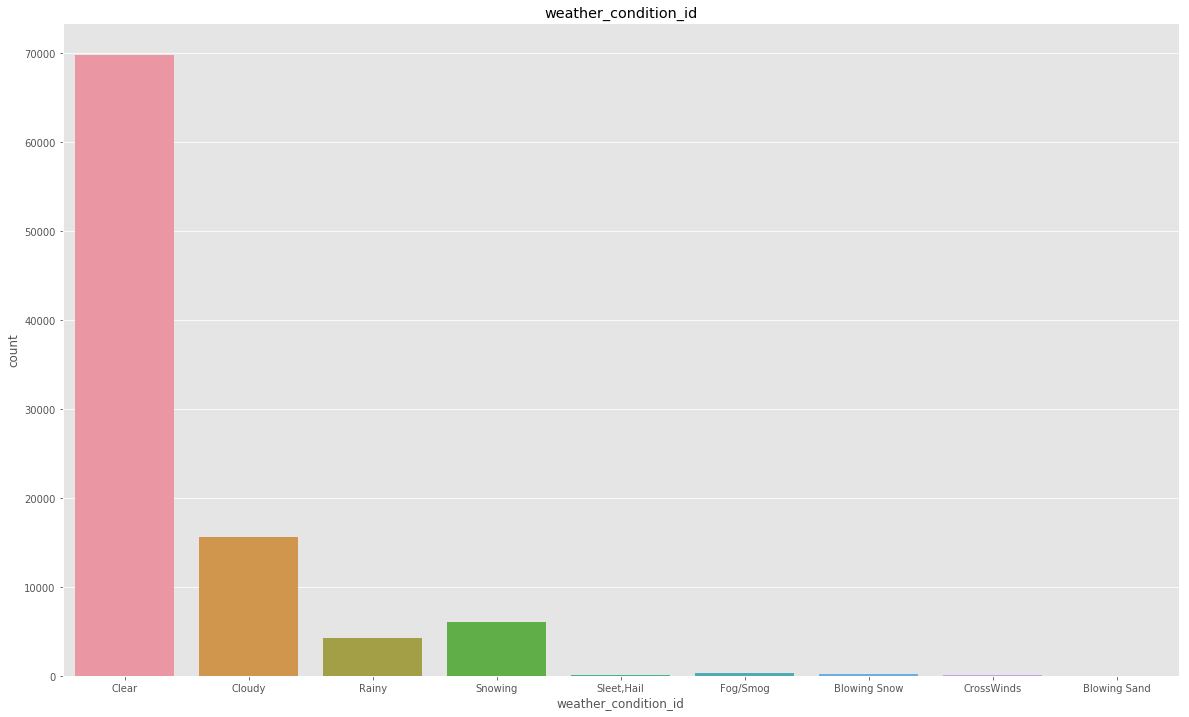

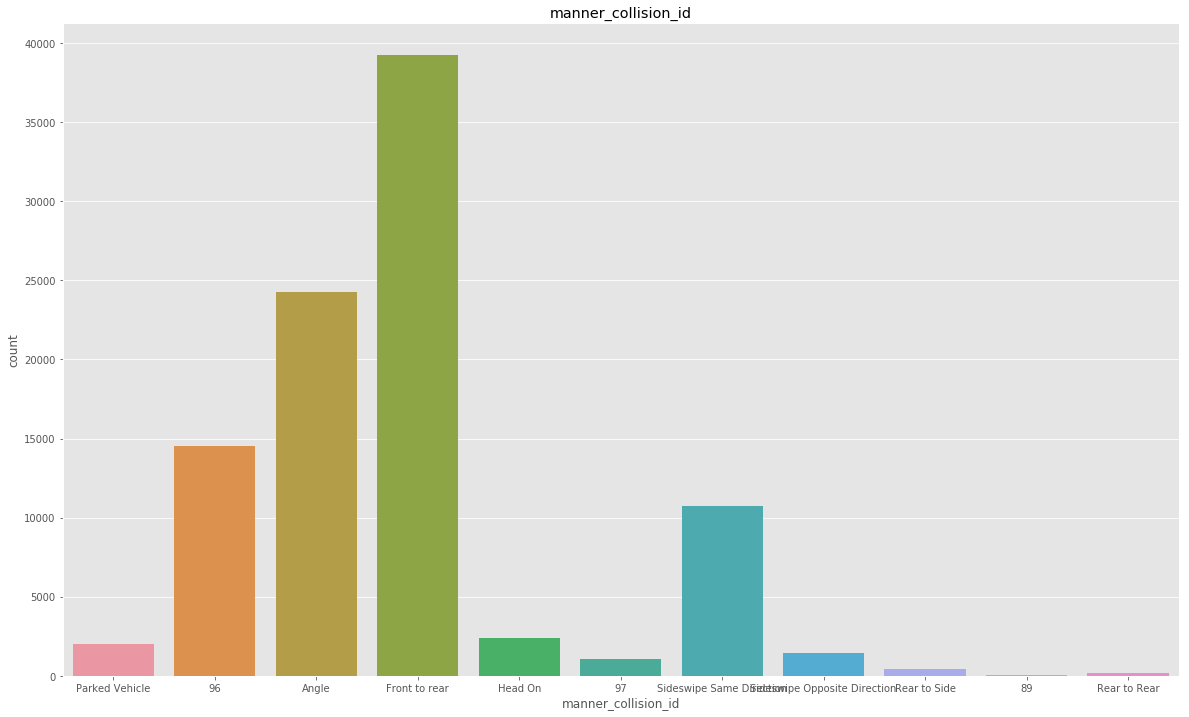

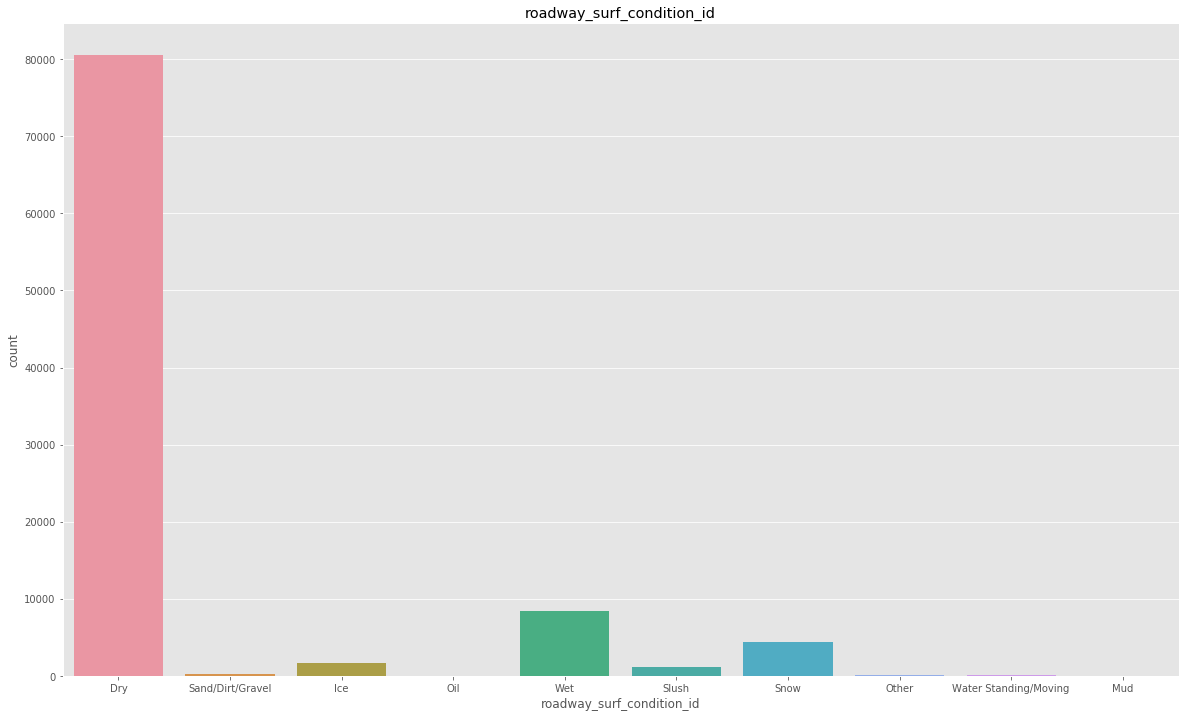

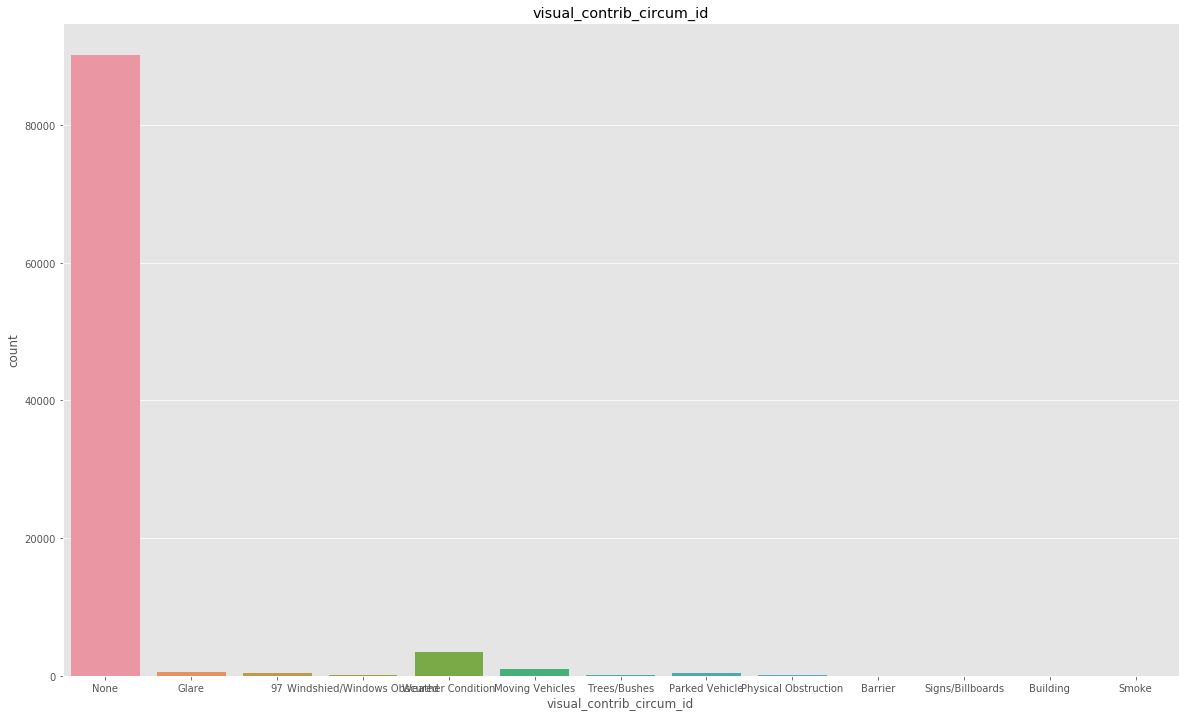

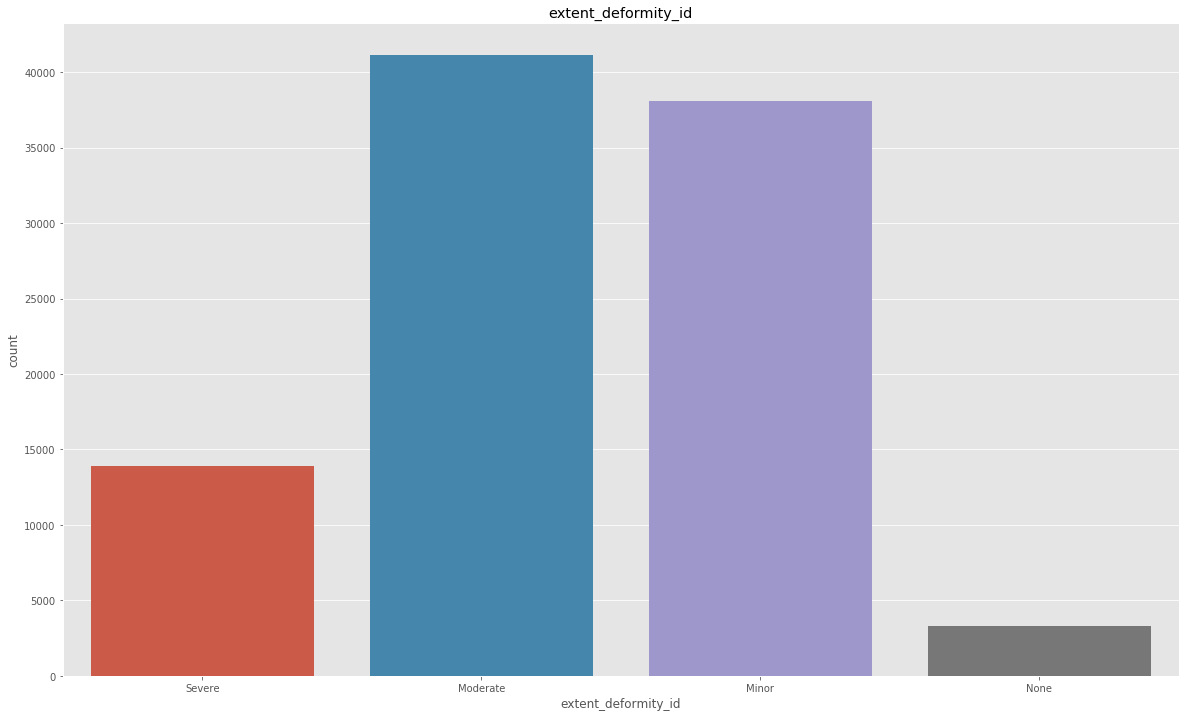

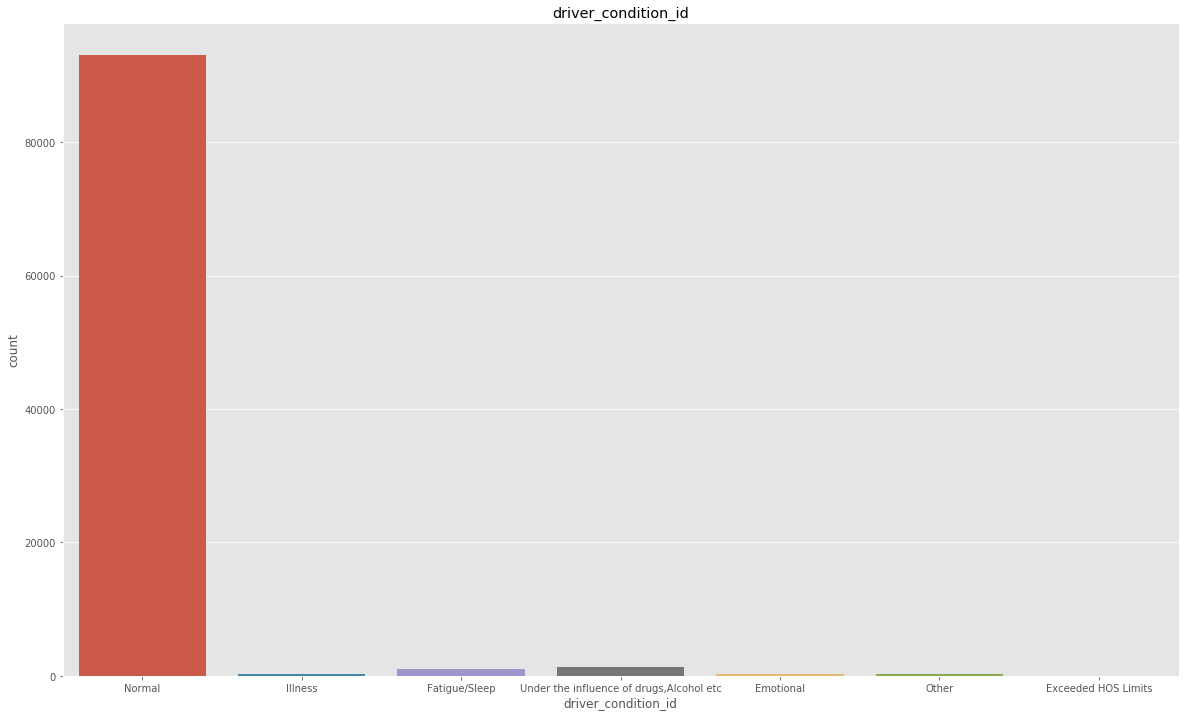

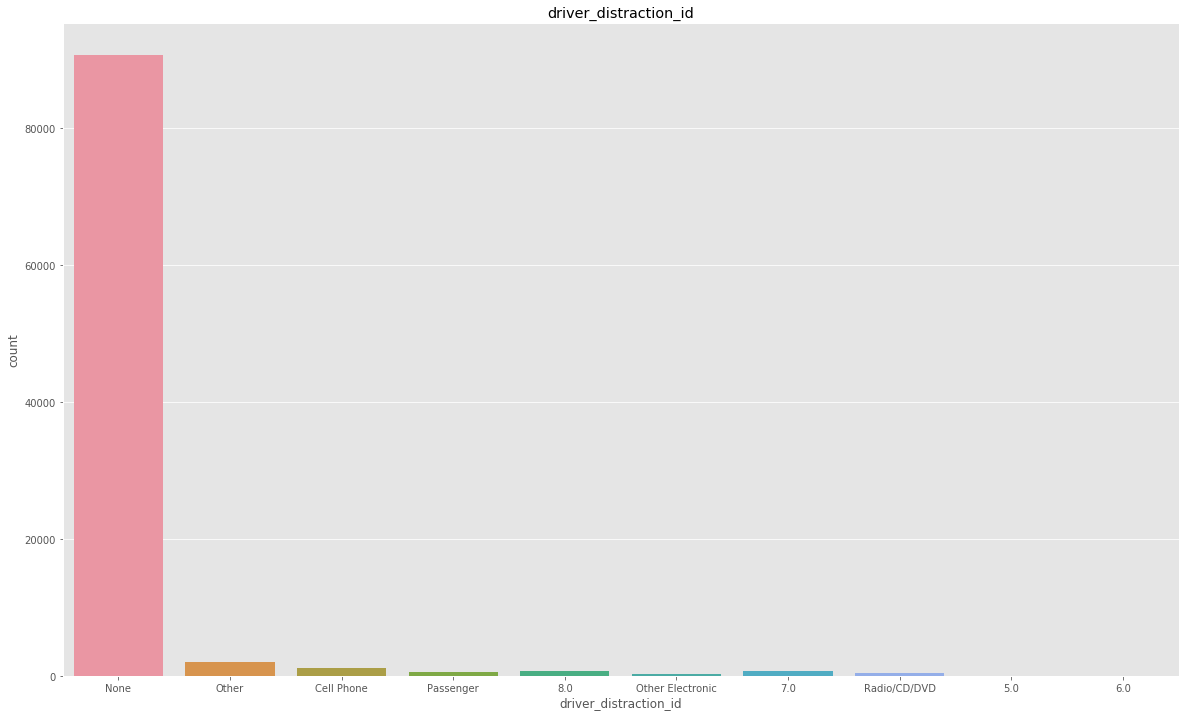

In [319]:
cols_plot = ['crash_severity_id',
 'light_condition_id',
 'weather_condition_id',
 'manner_collision_id',
 'roadway_surf_condition_id',
 'visual_contrib_circum_id',
 'extent_deformity_id',
 'driver_condition_id',
 'driver_distraction_id']

for i, col in enumerate(cols_plot):
    plt.figure(i)
    plt.figure(figsize=(20,12))
    sns.countplot(df_EDA[col])
    plt.title(col)

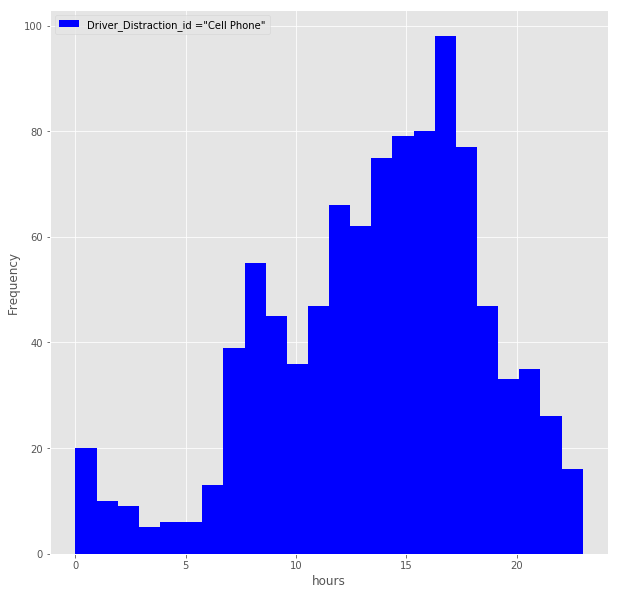

In [320]:
data[(data['driver_distraction_id']==1) & (data.year==2018)]['hour'].hist(bins=24, label = 'Driver_Distraction_id ="Cell Phone"',color='blue')
plt.legend(loc=2)
plt.xlabel('hours')
plt.ylabel('Frequency')
#plt.savefig('Driver_distraction_1.png')
plt.show()

** Interpretation ** : 
   - This graph shows that the highest accidents based on phone distraction occur between the hours of 2 PM to 6 PM.

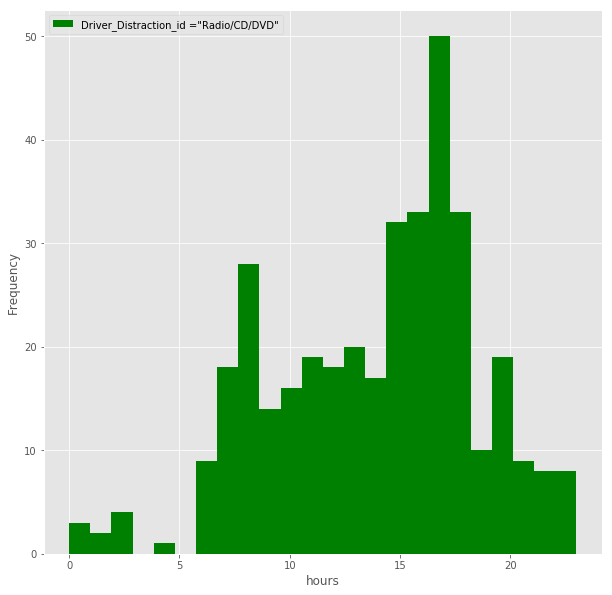

In [321]:
data[(data['driver_distraction_id']==2) & (data.year==2018)]['hour'].hist(bins=24, label = 'Driver_Distraction_id ="Radio/CD/DVD"',color='green')
plt.legend(loc=2)
plt.xlabel('hours')
plt.ylabel('Frequency')
#plt.savefig('Driver_distraction_1.png')
plt.show()

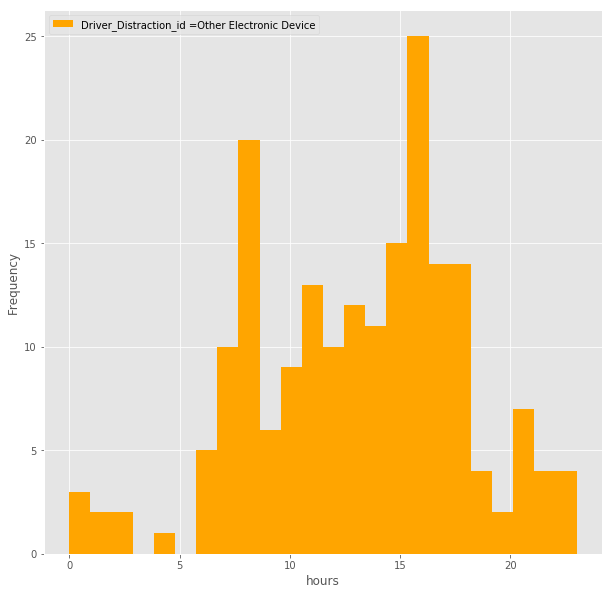

In [322]:
data[(data['driver_distraction_id']==3) & (data.year==2018)]['hour'].hist(bins=24, label = 'Driver_Distraction_id =Other Electronic Device',color='orange')
plt.legend(loc=2)
plt.xlabel('hours')
plt.ylabel('Frequency')
#plt.savefig('Driver_distraction_1.png')
plt.show()

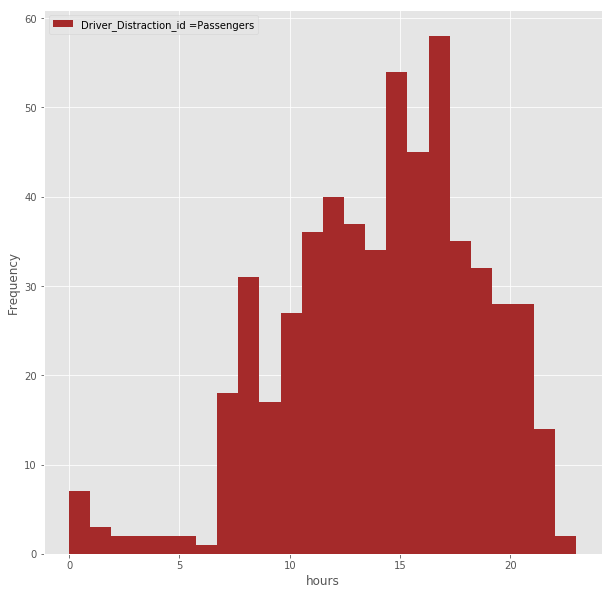

In [323]:
data[(data['driver_distraction_id']==4) & (data.year==2018)]['hour'].hist(bins=24, label = 'Driver_Distraction_id =Passengers',color='brown')
plt.legend(loc=2)
plt.xlabel('hours')
plt.ylabel('Frequency')
#plt.savefig('Driver_distraction_1.png')
plt.show()

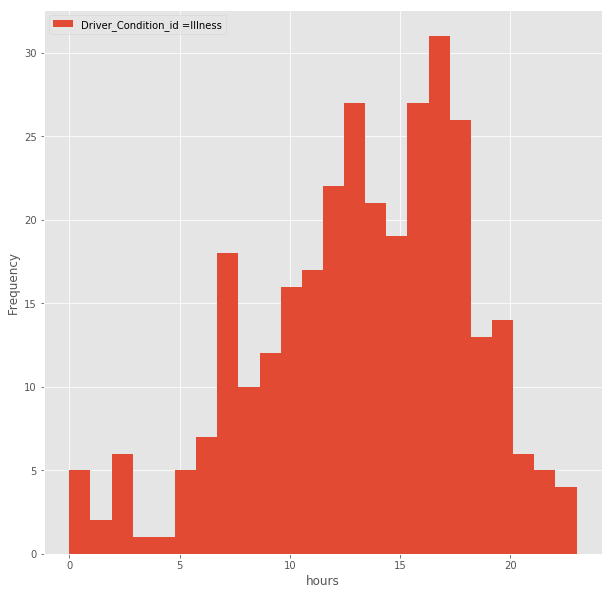

In [324]:
data[(data['driver_condition_id']==2) & (data.year==2018)]['hour'].hist(bins=24, label = 'Driver_Condition_id =Illness')
plt.legend(loc=2)
plt.xlabel('hours')
plt.ylabel('Frequency')
#plt.savefig('Driver_distraction_1.png')
plt.show()

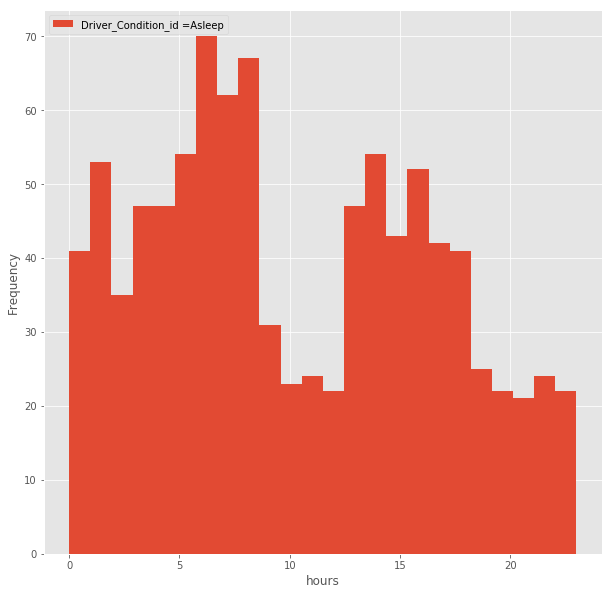

In [325]:
data[(data['driver_condition_id']==3) & (data.year==2018)]['hour'].hist(bins=24, label = 'Driver_Condition_id =Asleep')
plt.legend(loc=2)
plt.xlabel('hours')
plt.ylabel('Frequency')
#plt.savefig('Driver_distraction_1.png')
plt.show()

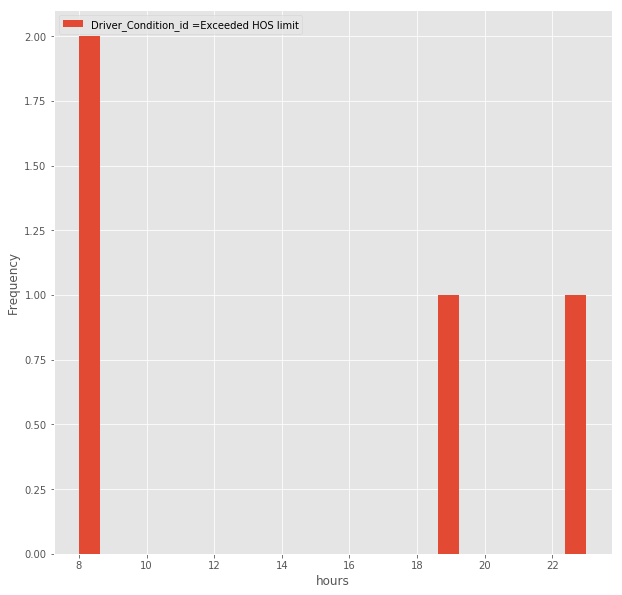

In [326]:
data[(data['driver_condition_id']==4) & (data.year==2018)]['hour'].hist(bins=24, label = 'Driver_Condition_id =Exceeded HOS limit')
plt.legend(loc=2)
plt.xlabel('hours')
plt.ylabel('Frequency')
#plt.savefig('Driver_distraction_1.png')
plt.show()

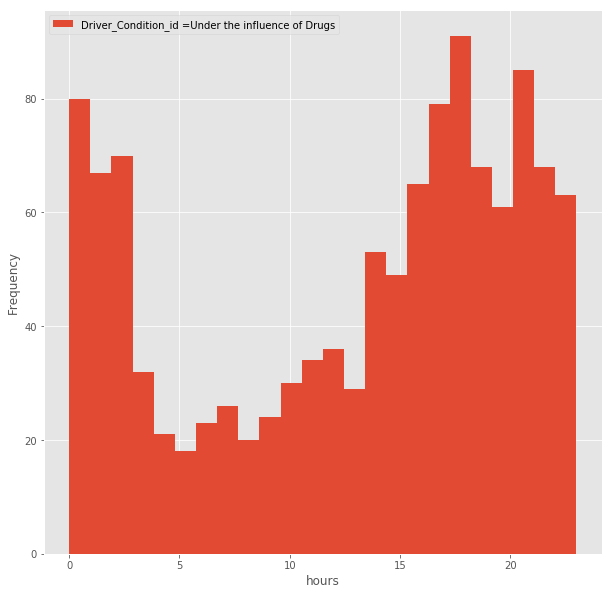

In [327]:
data[(data['driver_condition_id']==5) & (data.year==2018)]['hour'].hist(bins=24, label = 'Driver_Condition_id =Under the influence of Drugs')
plt.legend(loc=2)
plt.xlabel('hours')
plt.ylabel('Frequency')
#plt.savefig('Driver_distraction_1.png')
plt.show()

**Interpretation**
  - Most of the drivers by their condition or distraction are meeting with accident around 3 - 6 PM afternoon
  - Drunk people are more invovled in crashes during night time.

In [328]:
## STEP 5: Methods and Predictions

**Question:** Can we predict the Crash Severity status of a driver given their light,weather, manner of collision,roadway surface condition,roadway contribution circumstance,driver condition,driver distraction,posted speed,Visual contribution,extent of deformity, roadway description,age,injury level,injury cause, alcohol drug test result,sex,non motor vehicles attributes?

 - Going to use below classifiers
   - KNN
   - Decision Tree
   - Random forest
   - Naive Bayes

## METHOD 1 : Using KNN

**Check the head of the dataframe.**

In [329]:
#checking head
data.head()

,request_crash_id_x,county_id,location_description,city,route_direction,crash_severity_id,light_condition_id,weather_condition_id,manner_collision_id,roadway_surf_condition_id,...,nonmotor_location_id,time,date,year,month,dayofyear,quarter,days_in_month,day,hour
0,3000001,35,4760 w 4715 s,W VALLEY CITY,-,3,3,1,6,1,...,96.0,00:00:00,2018-01-01,2018,1,1,1,31,1,0
3,3000003,11,300 N Bridge; W Side,Clearfield,-,2,2,1,96,1,...,96.0,00:10:00,2018-01-01,2018,1,1,1,31,1,0
4,3000004,35,4490 S; BRICKGATE APTS; at 160 W,MURRAY,-,1,2,1,6,1,...,96.0,00:10:00,2018-01-01,2018,1,1,1,31,1,0
9,3000006,35,2765 S 2580 W,W VALLEY CITY,-,1,2,1,6,1,...,96.0,00:49:00,2018-01-01,2018,1,1,1,31,1,0
10,3000007,35,I-215 West Southbound; at 4400 South,TAYLORSVILLE,-,1,3,1,96,1,...,96.0,01:10:00,2018-01-01,2018,1,1,1,31,1,1


** Feature selection for modeling out outcome variable i.e Crash severity Id **

In [330]:
cols_models = [
 'light_condition_id',
 'weather_condition_id',
 'manner_collision_id',
 'roadway_surf_condition_id',
 'roadway_contrib_circum_id',
 'event_sequence_1_id',
 'visual_contrib_circum_id',
 'extent_deformity_id',
 'vehicle_contrib_circum_id',
 'travel_direction_id',
 'roadway_description_id',
 'injury_level_id',
 'injury_cause_id',
 'alcohol_drug_test_res_id',
 'driver_condition_id',
 'driver_distraction_id',
 'nonmotor_location_id']

In [331]:
#Checking one observation as a list input
data[cols_models].iloc[4].tolist()

[3.0,
 1.0,
 96.0,
 1.0,
 0.0,
 1.0,
 0.0,
 2.0,
 0.0,
 2.0,
 4.0,
 1.0,
 0.0,
 96.0,
 3.0,
 0.0,
 96.0]

**EDA for KNN Model**

**Use seaborn on the dataframe to create a pairplot**

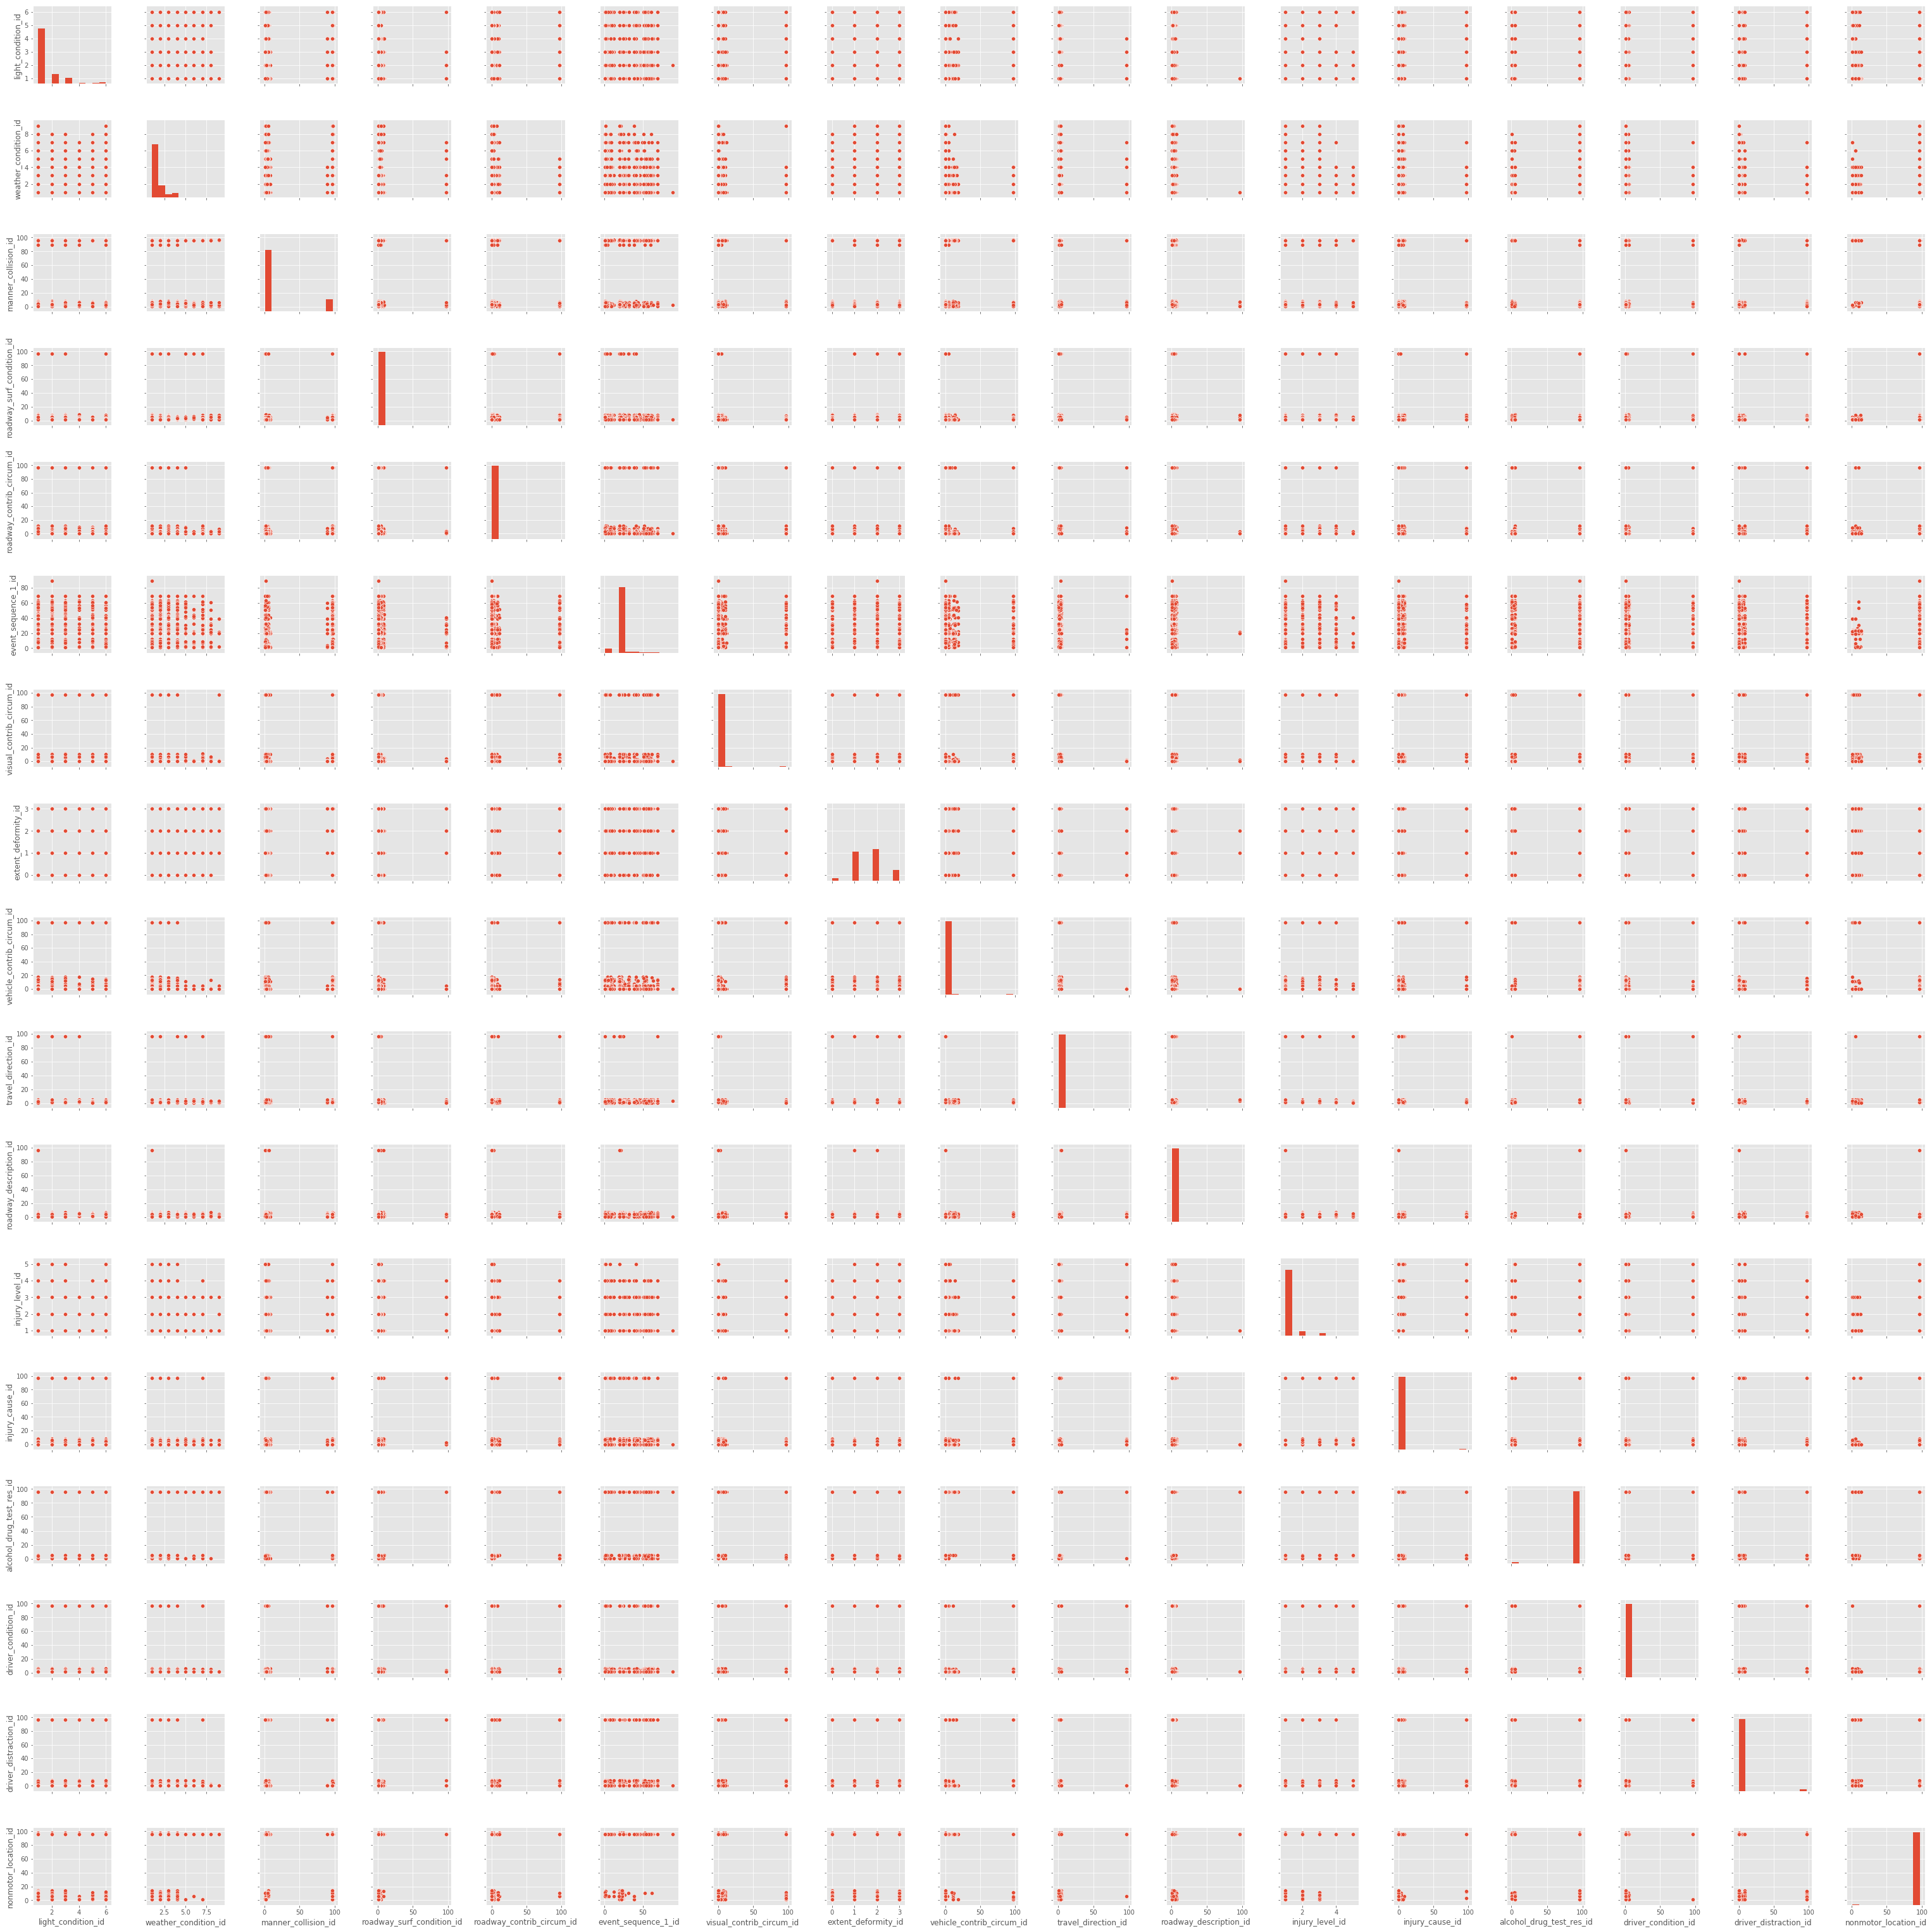

In [332]:
sns.pairplot(data[cols_models])

In [333]:
# define X and y [ Predictors and Target]
X = data[cols_models]
y = data['crash_severity_id']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)

In [334]:
#Training the KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
print(knn)

#fitting the model
knn_model = knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')


**Classification accuracy:** percentage of correct predictions

In [335]:
# predict with the training data
y_pred_train_knn = knn_model.predict(X_train)
# measure accuracy
print('Accuracy on training data = ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train_knn))

Accuracy on training data =  0.8146784709710034


In [336]:
# predict with the test data
y_pred_test_knn = knn_model.predict(X_test)
# measure accuracy
print('Accuracy on testing data = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred_test_knn))

Accuracy on testing data =  0.8059314564214237


In [337]:
#Checking on one observation if the predection is good.
print('INPUTS : \n',X_test.iloc[4])
print('\n')
print('EXPECTED OUTPUT \n:',y_test[4:5])

INPUTS : 
 light_condition_id            1.0
weather_condition_id          1.0
manner_collision_id           2.0
roadway_surf_condition_id     1.0
roadway_contrib_circum_id     0.0
event_sequence_1_id          20.0
visual_contrib_circum_id      0.0
extent_deformity_id           3.0
vehicle_contrib_circum_id     0.0
travel_direction_id           1.0
roadway_description_id        4.0
injury_level_id               2.0
injury_cause_id               0.0
alcohol_drug_test_res_id     96.0
driver_condition_id           1.0
driver_distraction_id         0.0
nonmotor_location_id         96.0
Name: 79895, dtype: float64


EXPECTED OUTPUT 
: 79895    2
Name: crash_severity_id, dtype: int64


In [338]:
# running the prediction on the above observation with the input in list form
print('PREDICTED :',knn_model.predict([X_test.iloc[4].tolist()]))

PREDICTED : [2]


### Confusion matrix - KNN

In [339]:
print(confusion_matrix(y_test,y_pred_test_knn))

[[14201    18    11     1     0]
 [ 2281   866    67     0     0]
 [  860   242   469     4     0]
 [   98    35    90     7     1]
 [   10     4    16     5     1]]


Comparing the **true** and **predicted** response values

In [340]:
# checking first 50 true and predicted values 
print('True: ' ,y_test.values[0:50])
print('Predicted: ' ,y_pred_test_knn[0:50])

True:  [2 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 3 1 1 1 1 1 1 2
 1 1 1 1 1 3 2 1 1 1 1 1 1]
Predicted:  [1 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
cross_val_score(KNeighborsClassifier(n_neighbors=15), X, y, cv=10).mean() # 80.1 % 

In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 15))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred_test_knn))

#Do not run the code takes time. best k = 14

In [ ]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## METHOD 2 : Using Naive Bayes


In [342]:
# define X [Predictors] and y[Target]
X = data[cols_models]
y = data['crash_severity_id']

In [343]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)

In [344]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [345]:
model_naive = GaussianNB()

In [346]:
model_naive.fit(X_train,y_train)

GaussianNB(priors=None)

**Classification accuracy:** percentage of correct predictions

In [347]:
y_pred_naive_train = model_naive.predict(X_train)

In [348]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_naive_train))

Accuracy: 0.7990459771604859


In [349]:
y_pred_naive = model_naive.predict(X_test)

In [350]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_naive))

Accuracy: 0.7950951418053611


In [351]:
cross_val_score(GaussianNB(), X, y, cv=10).mean()

0.7981004816905118

### Confusion Matrix Naive Bayes

In [352]:
print(confusion_matrix(y_test,y_pred_naive))

[[13841     0     1   109   280]
 [ 1956   916   163    45   134]
 [  754    79   549    31   162]
 [   79    16    77    11    48]
 [    5     1     8     4    18]]


In [353]:
# checking first 50 true and predicted values 
print('True: ' ,y_test.values[0:50])
print('\n')
print('Predicted: ' ,y_pred_naive[0:50])

True:  [2 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 3 1 1 1 1 1 1 2
 1 1 1 1 1 3 2 1 1 1 1 1 1]


Predicted:  [1 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 5 2 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1]


## METHOD 3 : Using Decision Tree

In [354]:
# define X and y
X = data[cols_models]
y = data['crash_severity_id']

In [355]:
def splitData(features):
   data_predictors = data[features]
   data_labels = data["crash_severity_id"]

   # Split into training and test sets
   XTrain, XTest, yTrain, yTest = train_test_split(data_predictors, data_labels, random_state=1, test_size=0.2)
   return XTrain, XTest, yTrain, yTest

In [356]:
from IPython.display import Image, display  
import pydotplus 
from scipy import misc

def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features,  
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))

In [357]:
#Run Decision tree on all features
XTrain, XTest, yTrain, yTest = splitData(cols_models)
decisionTree = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=10)
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Accuracy on training data=  0.8403307970497881
Accuracy on test data=  0.8371441903873075


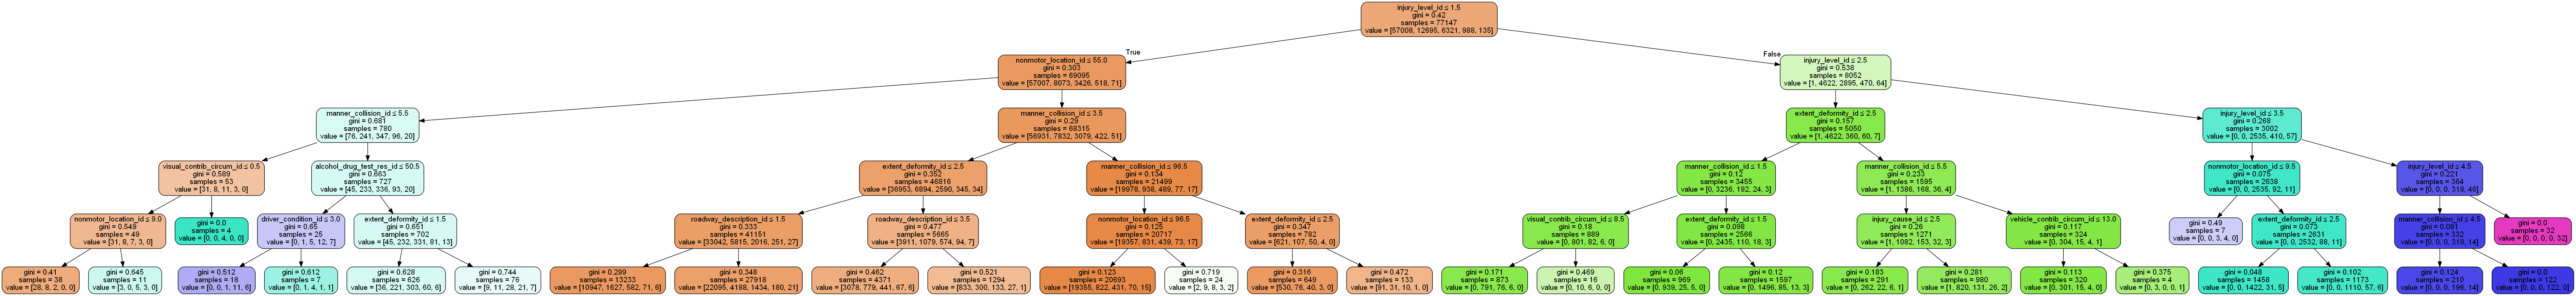

In [358]:
renderTree(decisionTree, cols_models)

In [359]:
cross_val_score(tree.DecisionTreeClassifier(max_depth=5,min_samples_split=10), X, y, cv=10).mean()

0.8392786709669121

In [360]:
print(confusion_matrix(yTest,y_pred))

[[14216     2    13     0     0]
 [ 2024  1140    50     0     0]
 [  783    93   697     2     0]
 [   81    17    46    87     0]
 [    8     3     9    10     6]]


In [361]:
# checking first 50 true and predicted values 
print('True: ' ,yTest.values[0:50])
print('\n')
print('Predicted: ' ,y_pred[0:50])

True:  [2 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 3 1 1 1 1 1 1 2
 1 1 1 1 1 3 2 1 1 1 1 1 1]


Predicted:  [1 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1]


## METHOD 4 : Using Random Forest

In [362]:
# define X and y
X = data[cols_models]
y = data['crash_severity_id']

In [363]:
from sklearn.ensemble import RandomForestClassifier

In [364]:
X_train, X_test, y_train, y_test = splitData(cols_models)

In [365]:
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy')
rfc = rfc.fit(X_train,y_train)

In [366]:
y_pred_rfc_train = rfc.predict(X_train)
y_pred_rfc = rfc.predict(X_test)

In [367]:
print('Accuracy on training data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_rfc_train))
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred_rfc))

Accuracy on training data=  0.8788287295682269
Accuracy on test data=  0.829470627884067


In [368]:
cross_val_score(RandomForestClassifier(), X, y, cv=7)

array([0.81811584, 0.81810263, 0.83218407, 0.82585656, 0.82549361,
       0.81727768, 0.81989111])

In [369]:
cross_val_score(RandomForestClassifier(), X, y, cv=7).mean()

0.8230602587939174

In [370]:
print(confusion_matrix(y_test,y_pred_rfc))

[[13989   165    70     6     1]
 [ 1916  1227    66     5     0]
 [  749   133   685     6     2]
 [   76    23    40    90     2]
 [    6     4     5    14     7]]


In [371]:
# checking first 50 true and predicted values 
print('True: ' ,yTest.values[0:50])
print('\n')
print('Predicted: ' ,y_pred_rfc[0:50])

True:  [2 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 3 1 1 1 1 1 1 2
 1 1 1 1 1 3 2 1 1 1 1 1 1]


Predicted:  [1 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 2]


## METHOD 5 : Logistic Regression

In [185]:
# define X and y Change it back to the values earlier used.
feature_cols = ['manner_collision_id']
X_log = data[feature_cols]
y = data['sex']

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_log, y,test_size=0.2,random_state=1)

In [187]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [188]:
# make class predictions for the testing set
y_pred_train = logreg.predict(X_train)
y_pred_class = logreg.predict(X_test)

In [172]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_test, y_pred_class))

0.583146460653039
0.580702027272256


In [173]:
# examine the class distribution of the testing set 
y_test.value_counts()

1    11200
0     8087
Name: sex, dtype: int64

In [174]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

1    0.580702
Name: sex, dtype: float64

In [175]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0]
Pred: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [176]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob[1:20]

array([0.64630193, 0.56987016, 0.5706995 , 0.5706995 , 0.64630193,
       0.56987016, 0.56987016, 0.57235698, 0.56987016, 0.56987016,
       0.56987016, 0.56987016, 0.5706995 , 0.5706995 , 0.57566704,
       0.64630193, 0.57152844, 0.5706995 , 0.5706995 ])

Text(0,0.5,'Frequency')

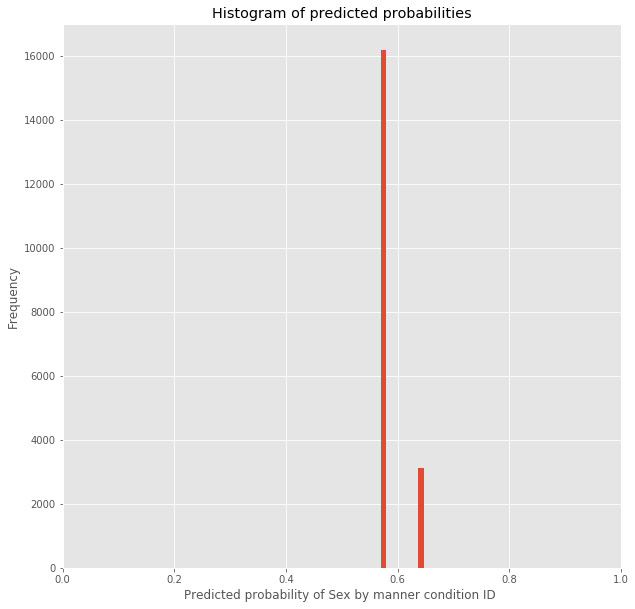

In [177]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Sex by manner condition ID ')
plt.ylabel('Frequency')

In [178]:
cross_val_score(logreg, X, y, cv=10).mean()

0.5856959563315456

## Predictive Probabilities

In [195]:
y_pred_prob_knn = knn_model.predict_proba(X_test)

In [196]:
y_pred_prob_dtree = decisionTree.predict_proba(XTest)

In [197]:
y_pred_prob_rfc = rfc.predict_proba(X_test)

Text(0,0.5,'Frequency')

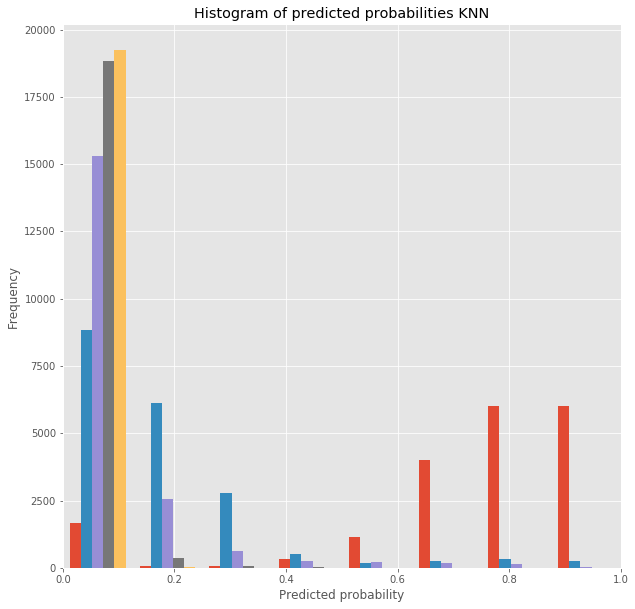

In [198]:
plt.hist(y_pred_prob_knn, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities KNN')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

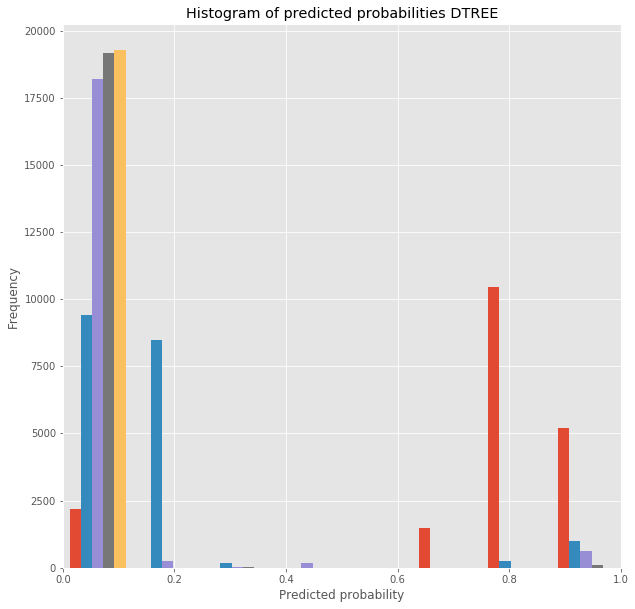

In [199]:
plt.hist(y_pred_prob_dtree, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities DTREE')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

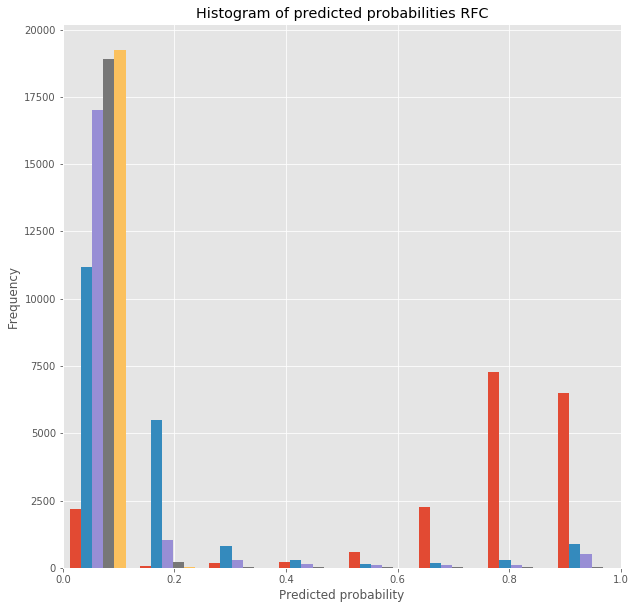

In [200]:
plt.hist(y_pred_prob_rfc, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities RFC')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

## END 